<a href="https://colab.research.google.com/github/sheha919/Cobaltocenium_project/blob/main/ml_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(display='diagram')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

import shap
from lime.lime_tabular import LimeTabularExplainer

## Customization Options
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context(context='notebook', font_scale= 1.2)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.facecolor']='white'

In [2]:
df=pd.read_excel('cobaltocenium_data.xlsx')
df.head()

,Unnamed: 0,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
0,0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,...,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932,-39.156000,3.337480,3.856084
1,1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,...,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932,-39.532500,3.314513,4.150980
2,2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,...,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932,-37.085250,3.312872,4.065847
3,3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,...,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932,-37.744125,3.333984,4.033683
4,4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,...,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932,-38.089250,3.328151,3.818543


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   903 non-null    int64  
 1   Name                         903 non-null    object 
 2   Co[CpY][CpY']OH energy (Eh)  903 non-null    float64
 3   CoCpY' name                  903 non-null    object 
 4   CoCpY'energy (Eh)            903 non-null    float64
 5   CpY name                     903 non-null    object 
 6   CpY energy (Eh)              903 non-null    float64
 7   BDE (kcal/mol)               903 non-null    float64
 8   Dipole moment(Debye)         903 non-null    float64
 9   EHOMO(Co[CpY][CpY']OH) (Eh)  903 non-null    float64
 10  ELUMO(Co[CpY][CpY']OH) (Eh)  903 non-null    float64
 11  EHOMO(CoCpY'OH) (Eh)         903 non-null    float64
 12  ELUMO(CoCpY'OH) (Eh)         903 non-null    float64
 13  EHOMO(CpY) (Eh)     

In [4]:
ml_df=df.copy()

In [5]:
ml_df=ml_df.drop(columns=['Unnamed: 0'], axis = 1)
ml_df.head()

,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,-0.0555,...,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932,-39.156000,3.337480,3.856084
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,-0.0607,...,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932,-39.532500,3.314513,4.150980
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,-0.0667,...,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932,-37.085250,3.312872,4.065847
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,-0.0659,...,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932,-37.744125,3.333984,4.033683
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,-0.0654,...,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932,-38.089250,3.328151,3.818543


#Filter Data

In [6]:
#BDE data greater than 3kcal/mol
drop_bde = (ml_df[ml_df['BDE (kcal/mol)']<=3])
len(drop_bde)

30

In [7]:
drop_bde['Name']

290            Co(Cp-C₂H)(Cp-CBr₃)OH
450             Co(Cp-Cl)(Cp-CBr₃)OH
479             Co(Cp-Br)(Cp-CBr₃)OH
507              Co(Cp-F)(Cp-CBr₃)OH
534      Co(Cp-(CO)NHCH₃)(Cp-CBr₃)OH
585       Co(Cp-(CO)OCH₃)(Cp-CBr₃)OH
632          Co(Cp-(CO)H)(Cp-CBr₃)OH
651        Co(Cp-(CO)F)(Cp-(CO)Cl)OH
654          Co(Cp-(CO)F)(Cp-CBr₃)OH
657           Co(Cp-(CO)F)(Cp-NO₂)OH
658        Co(Cp-(CO)F)(Cp-SOOCF₃)OH
672       Co(Cp-(CO)Cl)(Cp-(CO)Cl)OH
675         Co(Cp-(CO)Cl)(Cp-CBr₃)OH
676           Co(Cp-(CO)Cl)(Cp-CN)OH
678          Co(Cp-(CO)Cl)(Cp-NO₂)OH
679       Co(Cp-(CO)Cl)(Cp-SOOCF₃)OH
695            Co(Cp-CF₃)(Cp-CBr₃)OH
714           Co(Cp-CCl₃)(Cp-CBr₃)OH
732           Co(Cp-CBr₃)(Cp-CBr₃)OH
733             Co(Cp-CBr₃)(Cp-CN)OH
734         Co(Cp-CBr₃)(Cp-SOOCH₃)OH
735            Co(Cp-CBr₃)(Cp-NO₂)OH
736         Co(Cp-CBr₃)(Cp-SOOCF₃)OH
740        Co(Cp-CBr₃)(Cp-o-PhCF₃)OH
745    Co(Cp-CBr₃)(Cp-op-Ph(CH₃)₃)OH
752              Co(Cp-CN)(Cp-NO₂)OH
753           Co(Cp-CN)(Cp-SOOCF₃)OH
7

In [8]:
ml_df = ml_df[ml_df['BDE (kcal/mol)']>3]
len(ml_df)

873

In [9]:
frag = ml_df[["Name", "CoCpY' name", "CpY name", 
              "BDE (kcal/mol)",
              "EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", 
              "EHOMO(CpY) (Eh)", "ELUMO(CpY) (Eh)", 
              "CoCpY' Hirshfeld charge", "CpY Hirshfeld charge",
              "CoCpY' polarizability", "CpY polarizability"]]
frag.head()

,Name,CoCpY' name,CpY name,BDE (kcal/mol),EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,N(CH₃)₂,N(CH₃)₂,17.233174,-0.1787,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,OCH₃,N(CH₃)₂,17.545539,-0.1935,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,O(CO)CH₃,N(CH₃)₂,17.961810,-0.2170,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,P(CH₃)₂,N(CH₃)₂,16.445457,-0.2133,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,S(CH₃),N(CH₃)₂,14.308038,-0.2015,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932


C:\Users\sheha\AppData\Local\Temp\ipykernel_15896\1743145682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = abs(frag.corr())


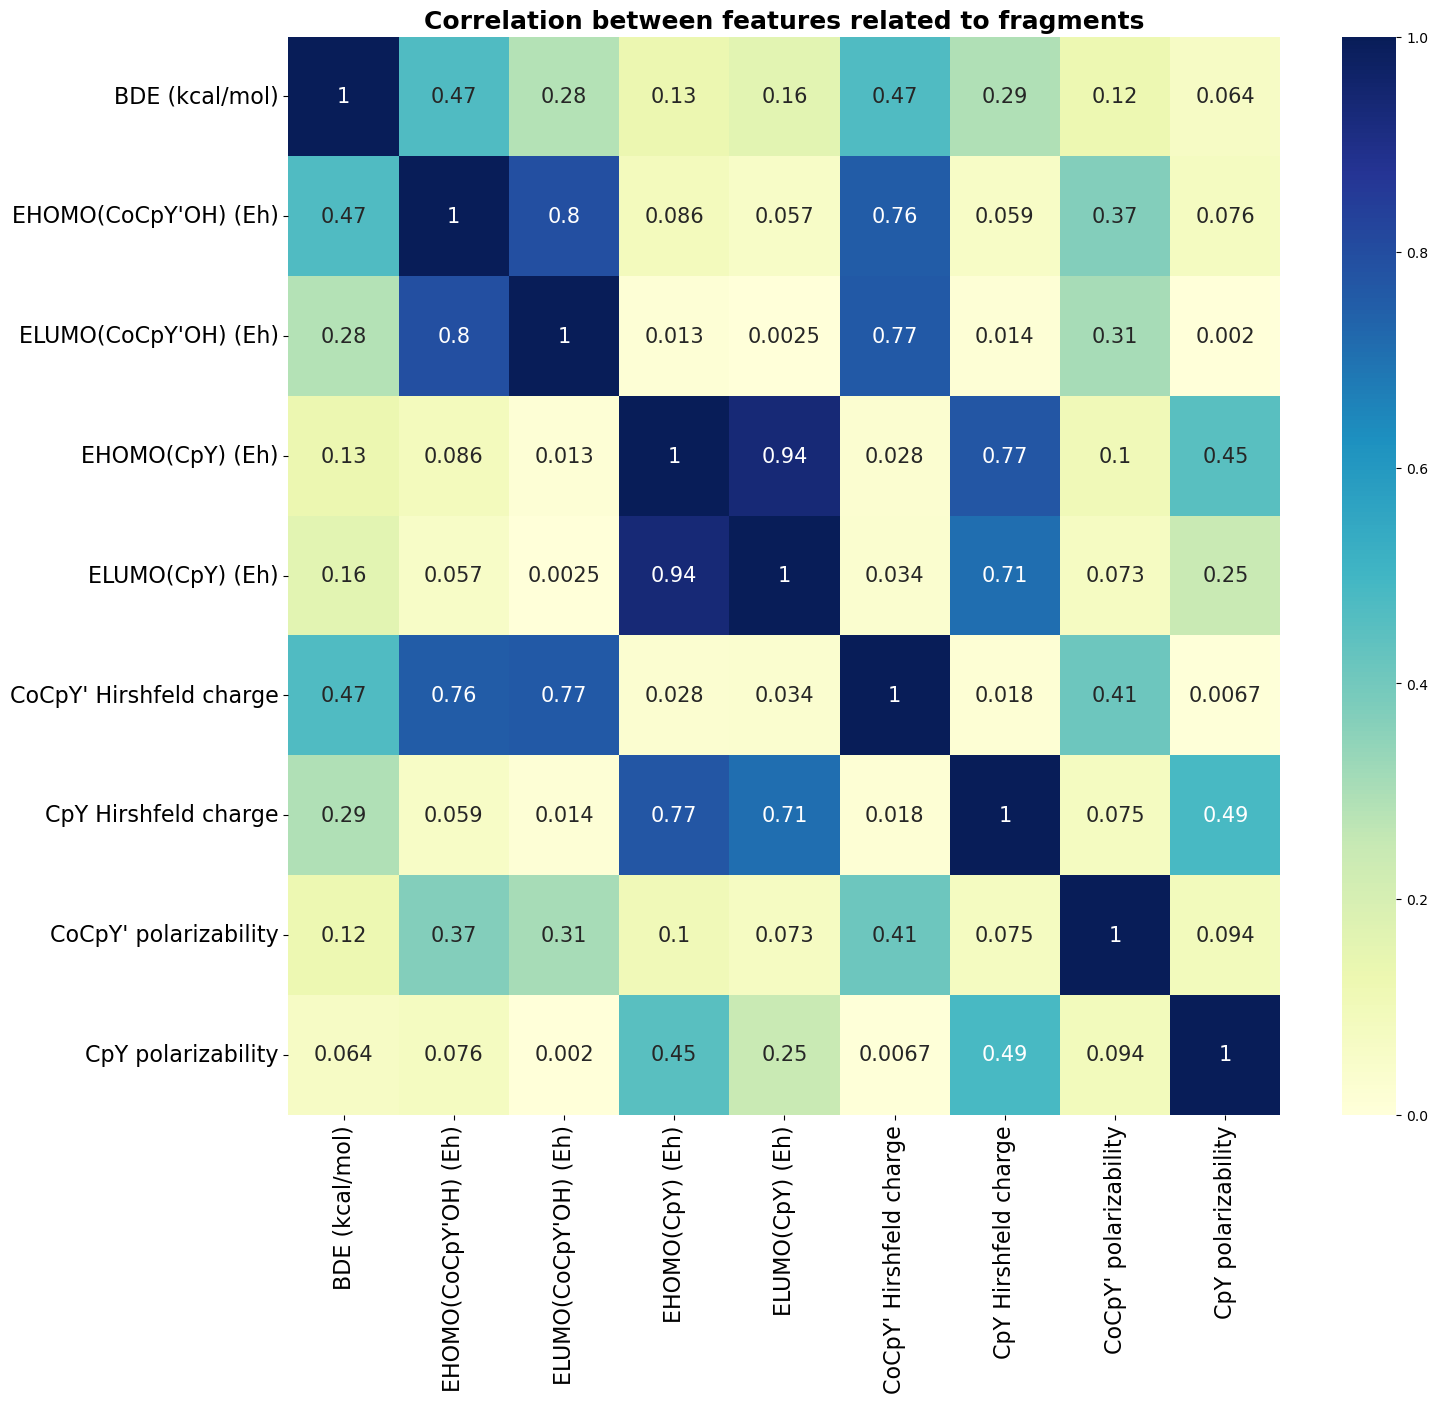

In [10]:
corr = abs(frag.corr())
plt.figure(figsize=[16,14])
sns.heatmap(corr, cmap="YlGnBu",  vmin=0.0, vmax=1.0,annot = True, annot_kws={'size': 15})
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Correlation between features related to fragments', fontsize = 18, fontweight = 'bold');

# Statistics

In [11]:
ml_df.describe()

,Co[CpY][CpY']OH energy (Eh),CoCpY'energy (Eh),CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
count,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000
mean,-2885.015296,-2078.544199,-806.446835,15.224432,16.170617,-0.191159,-0.086005,-0.214888,-0.085469,-0.200897,-0.117825,0.034738,0.020129,32.582851,48.667438,-32.992052,3.300790,4.008424
std,1343.930437,778.250606,1106.634781,6.629545,3.231558,0.006312,0.011437,0.013198,0.008885,0.021833,0.016527,0.062240,0.050861,29.889890,33.700939,3.965526,0.010104,0.159475
min,-10408.735637,-9411.126546,-7952.631083,3.185810,4.493000,-0.223500,-0.118800,-0.237800,-0.106800,-0.246900,-0.151300,-0.081960,-0.081960,0.265420,0.265420,-46.529125,3.282637,3.691918
25%,-2880.695616,-2220.117477,-768.161154,10.742214,14.038600,-0.191500,-0.093000,-0.224500,-0.092000,-0.216600,-0.125000,-0.024960,-0.015190,12.952910,22.669890,-35.328250,3.292941,3.896393
50%,-2567.428016,-1879.885018,-542.529457,14.245329,16.331700,-0.190000,-0.084900,-0.213300,-0.085100,-0.201000,-0.118300,0.038080,0.011965,24.041310,52.745580,-33.100625,3.298622,3.994029
75%,-2283.371861,-1766.531474,-397.996994,18.345363,18.211100,-0.188400,-0.078200,-0.204500,-0.079400,-0.188600,-0.112600,0.081263,0.057107,43.981350,60.200450,-30.465125,3.305980,4.104762
max,-1845.520993,-1652.003971,-193.474683,42.413274,27.728700,-0.180300,-0.054800,-0.171600,-0.063300,-0.155200,-0.076800,0.160449,0.160449,150.643000,150.643000,-22.935125,3.337480,4.725310


In [12]:
#checking for duplicates
ml_df.duplicated().sum()

0

In [13]:
#checking for missing values
ml_df.isna().sum().sum()

0

In [14]:
ml_df.head()

,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,-0.0555,...,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932,-39.156000,3.337480,3.856084
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,-0.0607,...,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932,-39.532500,3.314513,4.150980
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,-0.0667,...,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932,-37.085250,3.312872,4.065847
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,-0.0659,...,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932,-37.744125,3.333984,4.033683
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,-0.0654,...,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932,-38.089250,3.328151,3.818543


In [15]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 902
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         873 non-null    object 
 1   Co[CpY][CpY']OH energy (Eh)  873 non-null    float64
 2   CoCpY' name                  873 non-null    object 
 3   CoCpY'energy (Eh)            873 non-null    float64
 4   CpY name                     873 non-null    object 
 5   CpY energy (Eh)              873 non-null    float64
 6   BDE (kcal/mol)               873 non-null    float64
 7   Dipole moment(Debye)         873 non-null    float64
 8   EHOMO(Co[CpY][CpY']OH) (Eh)  873 non-null    float64
 9   ELUMO(Co[CpY][CpY']OH) (Eh)  873 non-null    float64
 10  EHOMO(CoCpY'OH) (Eh)         873 non-null    float64
 11  ELUMO(CoCpY'OH) (Eh)         873 non-null    float64
 12  EHOMO(CpY) (Eh)              873 non-null    float64
 13  ELUMO(CpY) (Eh)     

#Validate Split

In [16]:
y = ml_df['BDE (kcal/mol)']
X = ml_df[["EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", "EHOMO(CpY) (Eh)", "ELUMO(CpY) (Eh)", "CoCpY' Hirshfeld charge", "CpY Hirshfeld charge"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [17]:
X_train

,EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge
430,-0.2131,-0.0789,-0.2027,-0.1250,-0.050620,0.024095
79,-0.1956,-0.0633,-0.1886,-0.1003,-0.041080,-0.015190
148,-0.2133,-0.0814,-0.2469,-0.1496,-0.059590,0.132226
409,-0.2131,-0.0789,-0.2190,-0.1256,-0.050620,0.083209
440,-0.2121,-0.0807,-0.2198,-0.1243,0.079571,0.084139
...,...,...,...,...,...,...
106,-0.2297,-0.0944,-0.2092,-0.1170,0.156189,0.071736
270,-0.2003,-0.0802,-0.1552,-0.0768,0.008470,-0.081960
890,-0.2060,-0.0794,-0.1552,-0.0768,-0.042140,-0.081960
436,-0.2131,-0.0789,-0.1952,-0.1163,-0.050620,-0.040350


#Functions

## Evaluvation

In [18]:
#function for evaluation
def eval_model(pipe, X_train=X_train, y_train=y_train, X_test=X_test , y_test= y_test):
  eval_results = pd.DataFrame(columns = ['Metrics','Train Score', 'Test Score'])
  train_mae = mean_absolute_error(y_train, pipe.predict(X_train))
  test_mae = mean_absolute_error(y_test, pipe.predict(X_test))

  train_mse = mean_squared_error(y_train, pipe.predict(X_train))
  test_mse = mean_squared_error(y_test, pipe.predict(X_test))

  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)

  train_r2 = r2_score(y_train, pipe.predict(X_train))
  test_r2 = r2_score(y_test, pipe.predict(X_test))

  eval_results.loc[1, 'Metrics'] = 'MAE'
  eval_results.loc[2, 'Metrics'] = 'MSE'
  eval_results.loc[3, 'Metrics'] = 'RMSE'
  eval_results.loc[4, 'Metrics'] = 'R2'

  eval_results.loc[1, 'Train Score'] = train_mae
  eval_results.loc[2, 'Train Score'] = train_mse
  eval_results.loc[3, 'Train Score'] = train_rmse
  eval_results.loc[4, 'Train Score'] = train_r2

  eval_results.loc[1, 'Test Score'] = test_mae
  eval_results.loc[2, 'Test Score'] = test_mse
  eval_results.loc[3, 'Test Score'] = test_rmse
  eval_results.loc[4, 'Test Score'] = test_r2

  return eval_results

In [19]:
#function for final evaluation
def eval_model_final(pipe, 
                     X_train=X_train, y_train=y_train, 
                     X_test=X_test , y_test= y_test):

  train_mse = mean_squared_error(y_train, pipe.predict(X_train))
  test_mse = mean_squared_error(y_test, pipe.predict(X_test))

  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)

  train_r2 = r2_score(y_train, pipe.predict(X_train))
  test_r2 = r2_score(y_test, pipe.predict(X_test))

  return (round(train_r2,6), round(test_r2,6), round(train_rmse,6), round(test_rmse,6))

## Plot

In [20]:
def train_test_plot(model_name, pipe,  X_train=X_train, y_train=y_train, X_test=X_test , y_test= y_test):
  fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(12,4))
#subplot1
  ax = sns.regplot(x = y_train, 
                   y = pipe.predict(X_train), 
                   line_kws = {'color':'black', 'ls': ':', 'label' :f'R$^2$ = {round(r2_score(y_train, pipe.predict(X_train)), 6)}'}, 
                   ax=axes[0],
                   )
  axes[0].set_title('Train Data', fontweight = 'bold')
  axes[0].set_xlabel('Actual BDE (kcal/mol)')
  axes[0].set_ylabel('Predicted BDE (kcal/mol)');

#subplot2
  ax = sns.regplot(x = y_test, 
                   y = pipe.predict(X_test), 
                   line_kws = {'color':'black', 'ls': ':', 
                   'label' : f'R$^2$ = {round(r2_score(y_test, pipe.predict(X_test)), 6)}'}, 
                   ax=axes[1])
  axes[1].set_title('Test Data', fontweight = 'bold')
  axes[1].set_xlabel('Actual BDE (kcal/mol)')
  axes[1].set_ylabel('Predicted BDE (kcal/mol)')
  
  fig.suptitle(f'Train and Test Results of {model_name}', fontsize = 20, fontweight = 'bold', y = 1.1)
  [ax.legend() for ax in axes];
  return (fig, axes)

#Data Preprocessing

## Instantiate colimn transformers

In [21]:
scaler = StandardScaler()

# Linear Regression Model

In [22]:
lr = LinearRegression()
lr_pipe = make_pipeline(scaler, lr)
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [23]:
#evaluvation of linear rigression
eval_model(lr_pipe)

,Metrics,Train Score,Test Score
1,MAE,2.979453,3.068536
2,MSE,23.590921,26.731918
3,RMSE,4.857049,5.170292
4,R2,0.459858,0.400263


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

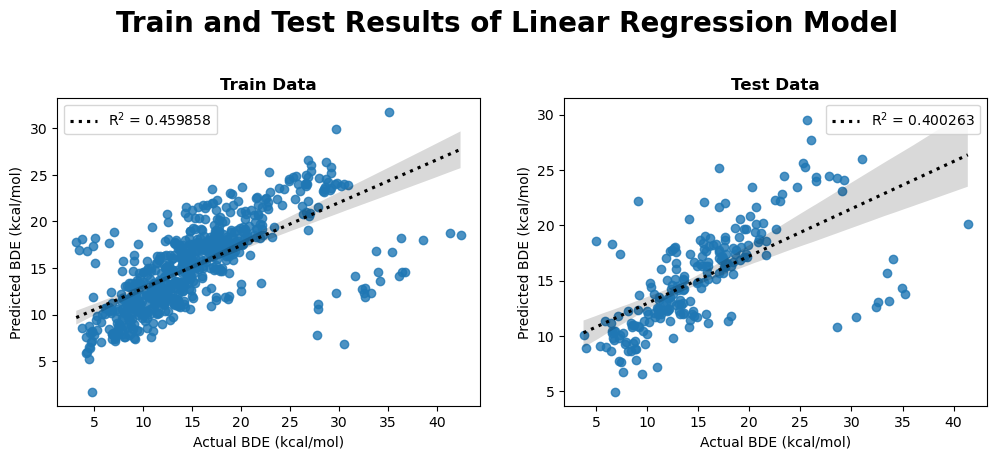

In [24]:
train_test_plot('Linear Regression Model', lr_pipe)

#Decision Tree Model

In [25]:
dt = DecisionTreeRegressor(random_state = 42)
dt_pipe = make_pipeline(scaler, dt)
dt_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [26]:
#evaluvation of initial decision tree
eval_model(dt_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.0,2.297034
2,MSE,0.0,22.243441
3,RMSE,0.0,4.716295
4,R2,1.0,0.500963


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

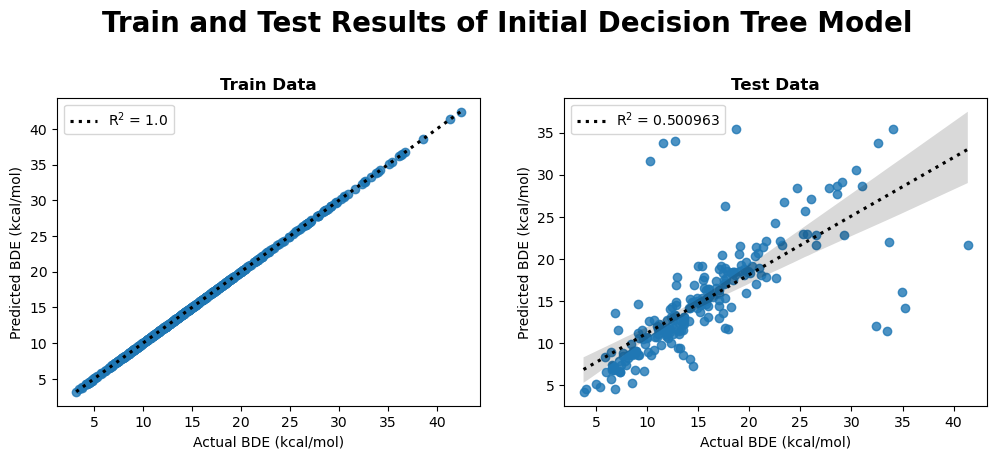

In [27]:
train_test_plot('Initial Decision Tree Model', dt_pipe)

#Bagged Tree Model

In [28]:
bt = BaggingRegressor(random_state = 42)
bt_pipe = make_pipeline(scaler, bt)
bt_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [29]:
#evaluvation of initial bagged tree
eval_model(bt_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.662925,1.870592
2,MSE,1.373204,10.762181
3,RMSE,1.171838,3.280576
4,R2,0.968559,0.758548


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

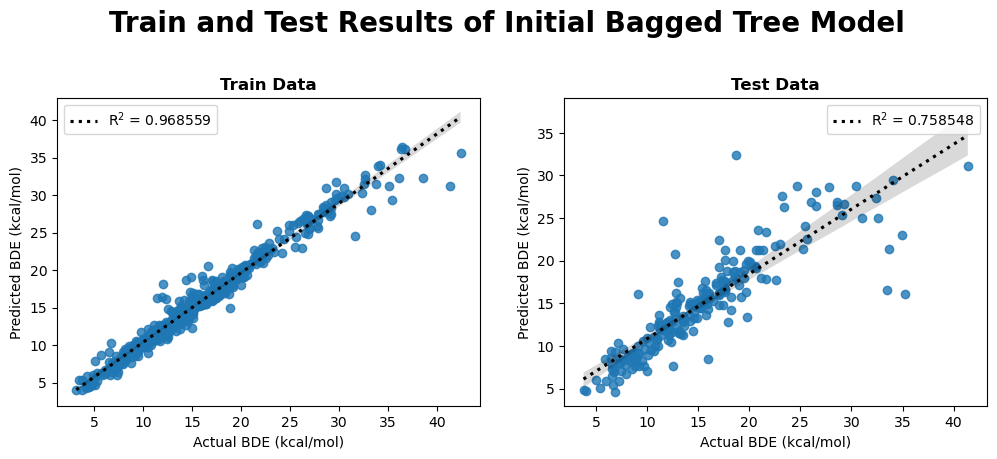

In [30]:
train_test_plot('Initial Bagged Tree Model', bt_pipe)

# K-Nearest Neighbors Model

In [31]:
knn = KNeighborsRegressor()
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [32]:
#evaluvation of initial knn
eval_model(knn_pipe)

,Metrics,Train Score,Test Score
1,MAE,2.202204,3.136901
2,MSE,13.104078,25.464302
3,RMSE,3.619956,5.046217
4,R2,0.699967,0.428702


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

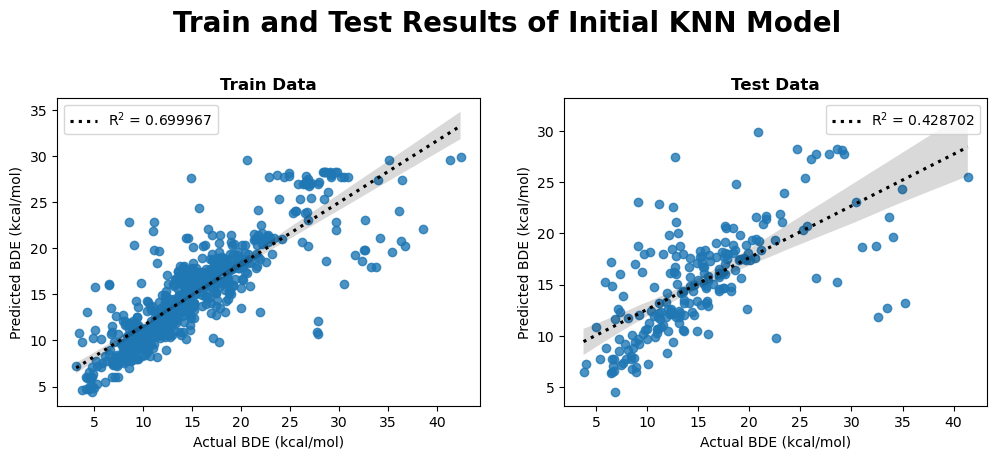

In [33]:
train_test_plot('Initial KNN Model', knn_pipe)

# Random Forest Model

In [34]:
rf = RandomForestRegressor(random_state= 42)
rf_pipe = make_pipeline(scaler, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [35]:
#evaluvation of initial bagged tree
eval_model(rf_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.536732,1.703929
2,MSE,0.782414,9.134505
3,RMSE,0.884542,3.022334
4,R2,0.982086,0.795065


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

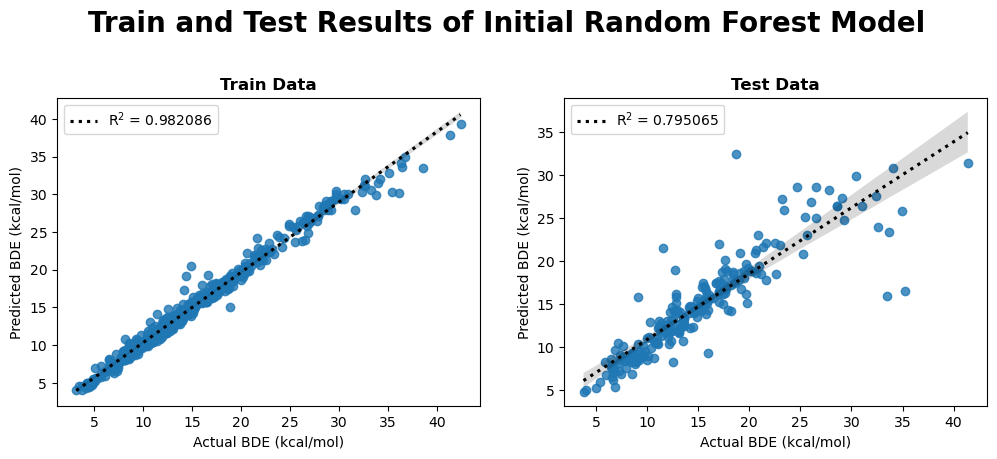

In [36]:
train_test_plot('Initial Random Forest Model', rf_pipe)

#Support Vector Regression Model

In [37]:
svg = SVR()
svg_pipe = make_pipeline(scaler, svg)
svg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [38]:
#evaluvation of initial svg
eval_model(svg_pipe)

,Metrics,Train Score,Test Score
1,MAE,2.702287,2.966963
2,MSE,22.741897,27.702162
3,RMSE,4.768846,5.263284
4,R2,0.479298,0.378495


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

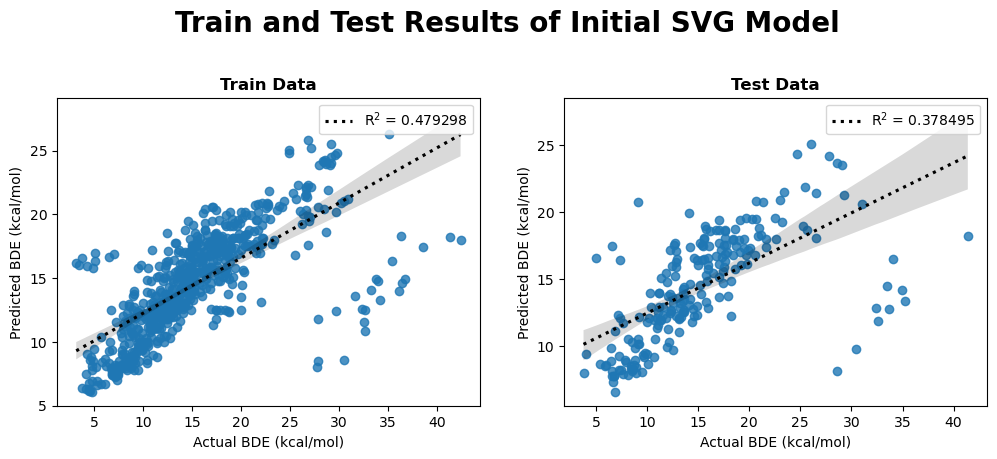

In [39]:
train_test_plot('Initial SVG Model', svg_pipe)

# XG Boost

In [40]:
xgb = XGBRegressor(random_state= 42)
xgb_pipe = make_pipeline(scaler, xgb)
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=12, num_parallel_tree=1, predictor='auto',
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [41]:
#evaluvation of initial xgb
eval_model(xgb_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.094329,1.342218
2,MSE,0.020614,7.029737
3,RMSE,0.143575,2.651365
4,R2,0.999528,0.842286


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

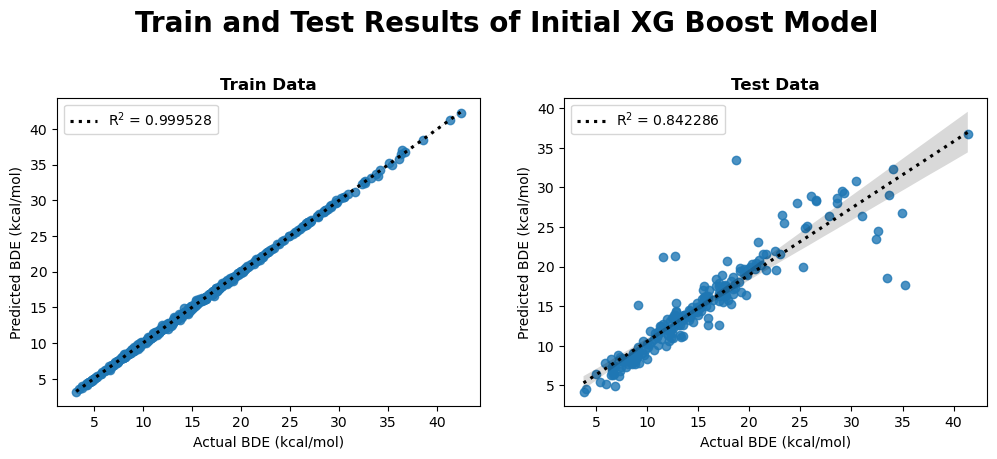

In [42]:
train_test_plot('Initial XG Boost Model', xgb_pipe)

#Evaluvation of initial models

In [43]:
model = ['Linear Regression', 'Decision Tree', 'Bagged Tree', 'KNN', 'Random Forest', 'SVG', 'XG Boost']
pipe = [lr_pipe, dt_pipe, bt_pipe, knn_pipe, rf_pipe, svg_pipe, xgb_pipe]
final_eval_results = pd.DataFrame(columns = ['Model','Train R2', 'Test R2', 'Train RMSE (kcal/mol)', 'Test RMSE (kcal/mol)'])

for i in range(len(model)):
  final_eval_results.loc[i, 'Model'] = model[i]
  final_eval_results.loc[i,'Train R2'], final_eval_results.loc[i,'Test R2'], final_eval_results.loc[i,'Train RMSE (kcal/mol)'], final_eval_results.loc[i,'Test RMSE (kcal/mol)'] = eval_model_final(pipe[i])

In [44]:
final_eval_results.set_index('Model', inplace = True) 
final_eval_results

,Train R2,Test R2,Train RMSE (kcal/mol),Test RMSE (kcal/mol)
Model,,,,
Linear Regression,0.459858,0.400263,4.857049,5.170292
Decision Tree,1.0,0.500963,0.0,4.716295
Bagged Tree,0.968559,0.758548,1.171838,3.280576
KNN,0.699967,0.428702,3.619956,5.046217
Random Forest,0.982086,0.795065,0.884542,3.022334
SVG,0.479298,0.378495,4.768846,5.263284
XG Boost,0.999528,0.842286,0.143575,2.651365


- According to the train and test RMSE values for the models;
  - all models have overfilling issue and decision tree has the highest overfittin problem.
- Out of these 7 models, XG boost, random forest and bagged tree are selected based on the test R$^2$ score to do further optimizations.


#Tunning Hyperparametrs and cross validation of models

## For XG Boost

In [45]:
#parametrs of XG boost model
xgb_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('xgbregressor',
   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=12,
                num_parallel_tree=1, predictor='auto', random_state=42,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'xgbregressor': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1,

In [46]:
xgb_param_grid = {'xgbregressor__max_depth': [2, 3, 4, 5, 6 ],
                  'xgbregressor__n_estimators': [75, 100, 250, 500, 600, 700, 800, 900, 1000]}

In [47]:
xgb_pipe_gs = GridSearchCV(xgb_pipe, xgb_param_grid, cv=5)
xgb_pipe_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     enable_categorical=False,
                                                     gamma=0, gpu_id=-1,
                                                     importance_type=None,
                                                     interaction_constraints='',
                                                     learning_rate=0.300000012,
                                                     max_delta_step=0,
                                                     max_depth=6,
                                                     min_c...
                                                     missing=nan,
                                                     monotone_constraints='()',
                                                     n_estimators=100,
                                                     n_jobs=12,
                                                     num_parallel_tree=1,
                                                     predictor='auto',
                                                     random_state=42,
                                                     reg_alpha=0, reg_lambda=1,
                                                     scale_pos_weight=1,
                                                     subsample=1,
                                                     tree_method='exact',
                                                     validate_parameters=1,
                                                     verbosity=None))]),
             param_grid={'xgbregressor__max_depth': [2, 3, 4, 5, 6],
                         'xgbregressor__n_estimators': [75, 100, 250, 500, 600,
                                                        700, 800, 900, 1000]})

In [48]:
print(f'Best parameters: {xgb_pipe_gs.best_params_}')

Best parameters: {'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 250}


In [49]:
xgb_opt = xgb_pipe_gs.best_estimator_
xgb_opt.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=3, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=250,
                              n_jobs=12, num_parallel_tree=1, predictor='auto',
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [50]:
eval_model(xgb_opt)

,Metrics,Train Score,Test Score
1,MAE,0.44843,1.218329
2,MSE,0.533889,6.713296
3,RMSE,0.730677,2.591003
4,R2,0.987776,0.849386


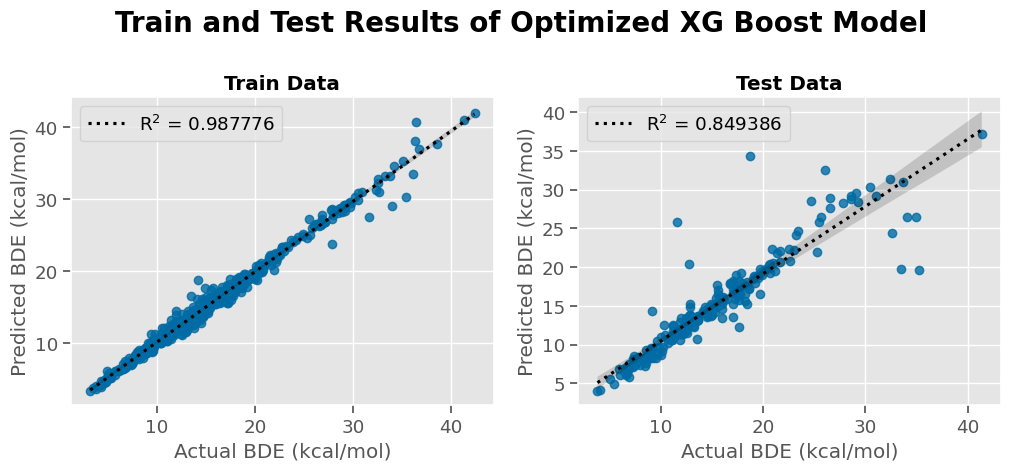

In [205]:
train_test_plot('Optimized XG Boost Model', xgb_opt)
plt.savefig('xgb_opt.png')

In [252]:
feature_names = scaler.get_feature_names_out()
feature_names

array(["EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", 'EHOMO(CpY) (Eh)',
       'ELUMO(CpY) (Eh)', "CoCpY' Hirshfeld charge",
       'CpY Hirshfeld charge'], dtype=object)

In [253]:
scaler.fit(X_train, y_train)

StandardScaler()

In [254]:
#reading X_train into a dataframes
X_train_df = pd.DataFrame(scaler.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)
X_train_df.head()

,EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge
430,0.140253,0.725482,-0.082417,-0.444145,-1.359413,0.091078
79,1.464671,2.464389,0.568879,1.073235,-1.207357,-0.700654
148,0.125117,0.446811,-2.124068,-1.955382,-1.502383,2.270301
409,0.140253,0.725482,-0.835333,-0.481004,-1.359413,1.282435
440,0.215934,0.524839,-0.872286,-0.401142,0.715673,1.301178


In [257]:
#reading X_test into a dataframes
X_test_df = pd.DataFrame(scaler.transform(X_test), 
                          columns = feature_names,
                         index = X_test.index)
X_test_df.head()

,EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge
825,0.541362,0.636307,-0.123989,-0.364283,-0.736366,-0.626892
320,0.730565,0.848097,-1.685251,-1.599074,-0.950423,1.656041
383,1.063562,-1.013425,-1.158672,-1.095328,-1.092438,0.550680
764,-1.116052,-1.002278,2.111665,2.516897,1.936871,-2.046306
423,0.140253,0.725482,-1.967018,-2.059817,-1.359413,2.839095


In [258]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    rmse_train = mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [260]:
## fitting a xgb model
xgb_fi = XGBRegressor(max_depth=3, n_estimators= 250)
xgb_fi.fit(X_train_df, y_train)
evaluate_regression(xgb_fi, X_train_df, y_train, X_test_df,y_test)

C:\Users\sheha\anaconda3\envs\dojo-env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Training Data:	R^2= 0.99	RMSE= 0.73
Test Data:	R^2= 0.85	RMSE= 2.59


In [261]:
#Extracting Feature Importances
xgb_fi.feature_importances_

array([0.12561342, 0.2560831 , 0.12360191, 0.06065843, 0.2677315 ,
       0.16631159], dtype=float32)

In [262]:
#Saving the importances as a Pandas Series
importances = pd.Series(xgb_fi.feature_importances_, index=feature_names,
                       name = 'Fearture Importance')
importances.sort_values(ascending=False)

CoCpY' Hirshfeld charge    0.267731
ELUMO(CoCpY'OH) (Eh)       0.256083
CpY Hirshfeld charge       0.166312
EHOMO(CoCpY'OH) (Eh)       0.125613
EHOMO(CpY) (Eh)            0.123602
ELUMO(CpY) (Eh)            0.060658
Name: Fearture Importance, dtype: float32

In [263]:
importances.sum()

1.0

[Text(0.5, 0, 'Importance'),
 Text(0, 0.5, 'Features'),
 Text(0.5, 1.0, 'XGB Important Features')]

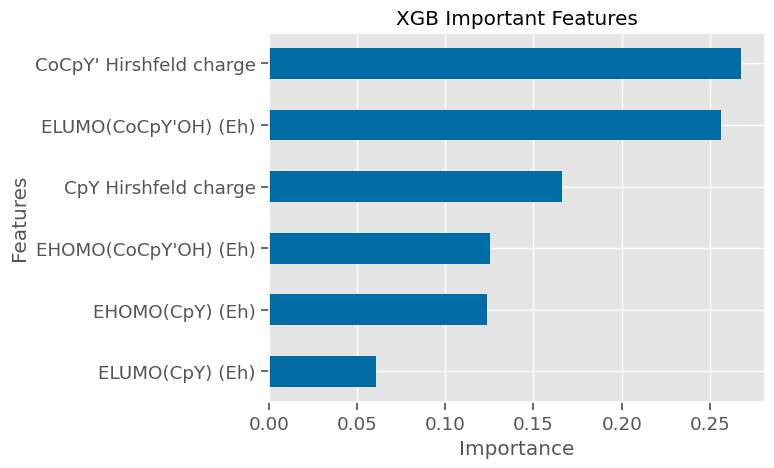

In [264]:
## plot importances 
ax= importances.sort_values(ascending=True).tail(8).plot(kind = 'barh')
ax.set(xlabel = 'Importance', ylabel = 'Features', 
       title='XGB Important Features')


In [266]:
#init shap
shap.initjs()

# taking a sample of training data
SEED = 321
X_shap = shap.sample(X_train_df, nsamples= 500, random_state=SEED)
X_shap

y_shap = y_train.loc[X_shap.index]
y_shap

# Creating a model explainer
explainer = shap.Explainer(xgb_fi)
explainer

# Calculating the shap values for the  model
shap_values = explainer(X_shap, y_shap)
shap_values[0]

shap_values.shape

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


(500, 6)

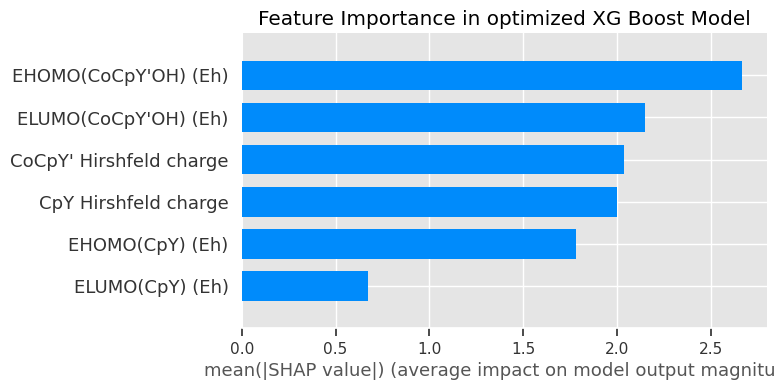

In [301]:
## create a summary plot (bar version)
ax= shap.summary_plot(shap_values, plot_type= 'bar', show= False)
plt.title('Feature Importance in optimized XG Boost Model')
plt.savefig('xgb_opt_fi.png')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


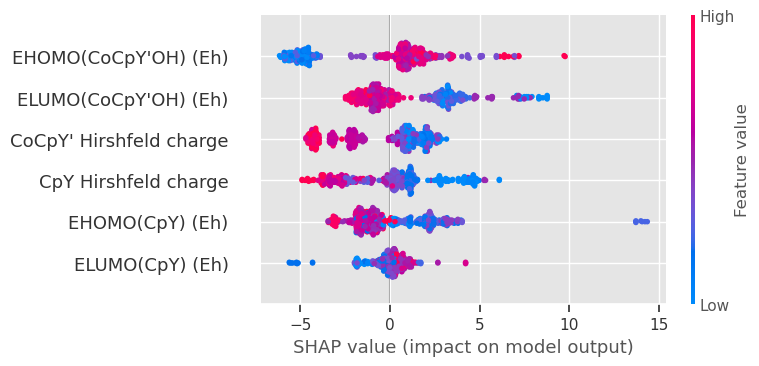

In [302]:
## create a summary plot (dot/default version)
shap.summary_plot(shap_values, show = False);
plt.savefig('xgb_opt_fi_shap.png')

In [308]:
predicted_y =  pd.DataFrame(index = y_test.index)
predicted_y['predicted_bde'] = xgb_opt.predict(X_test)
predicted_y

,predicted_bde
825,16.662981
320,17.117128
383,29.160648
764,14.278896
423,9.657981
...,...
628,6.298653
525,20.346857
339,22.316170
664,8.433908


In [309]:
new_test_data = pd.concat([X_test, predicted_y], axis = 1)
new_test_data

,EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,predicted_bde
825,-0.2078,-0.0797,-0.2036,-0.1237,-0.011530,-0.011530,16.662981
320,-0.2053,-0.0778,-0.2374,-0.1438,-0.024960,0.101747,17.117128
383,-0.2009,-0.0945,-0.2260,-0.1356,-0.033870,0.046900,29.160648
764,-0.2297,-0.0944,-0.1552,-0.0768,0.156189,-0.081960,14.278896
423,-0.2131,-0.0789,-0.2435,-0.1513,-0.050620,0.160449,9.657981
...,...,...,...,...,...,...,...
628,-0.2277,-0.0920,-0.2374,-0.1438,0.081263,0.101747,6.298653
525,-0.2192,-0.0863,-0.2190,-0.1314,0.031767,0.031767,20.346857
339,-0.2053,-0.0778,-0.1552,-0.0768,-0.024960,-0.081960,22.316170
664,-0.2322,-0.0943,-0.2027,-0.1250,0.101747,0.024095,8.433908


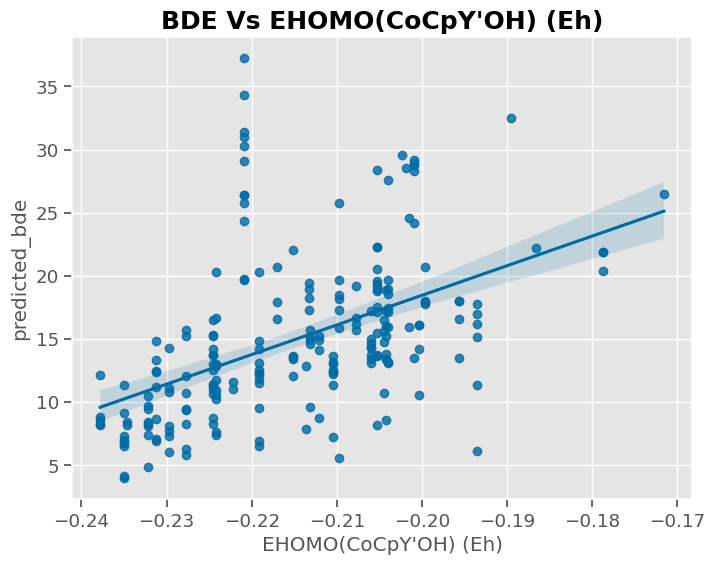

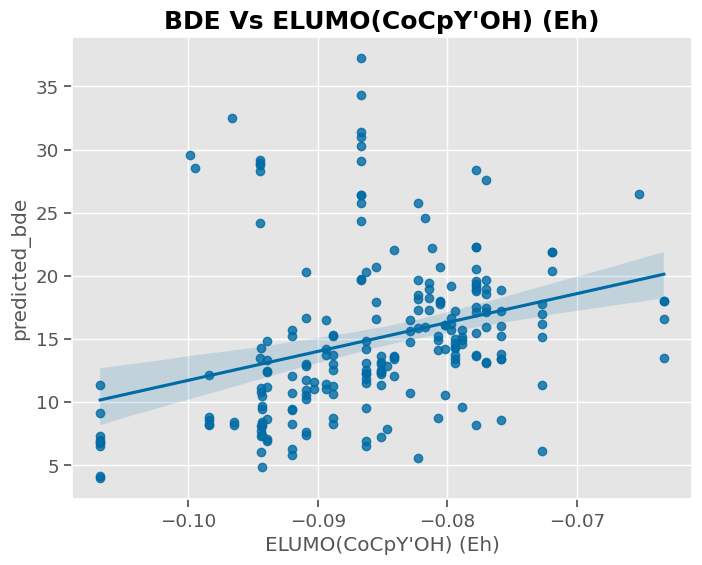

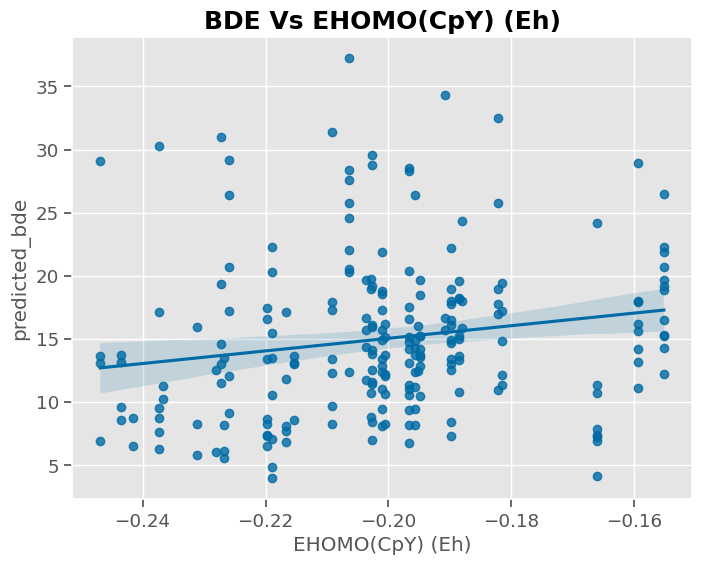

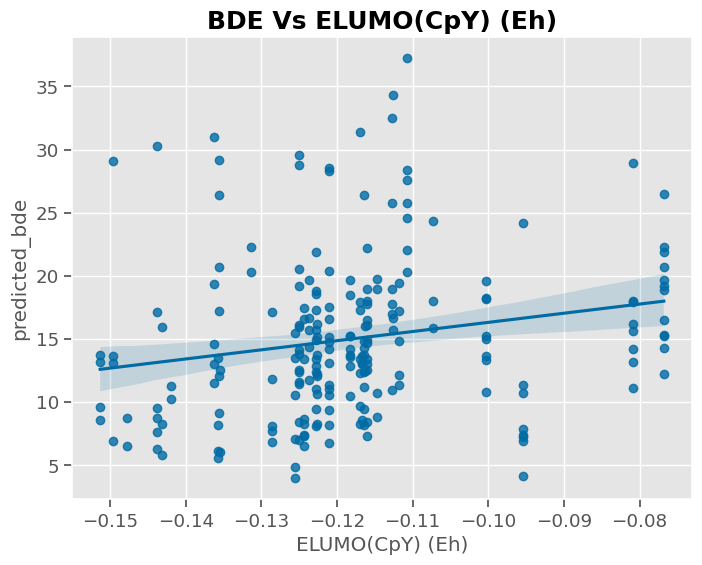

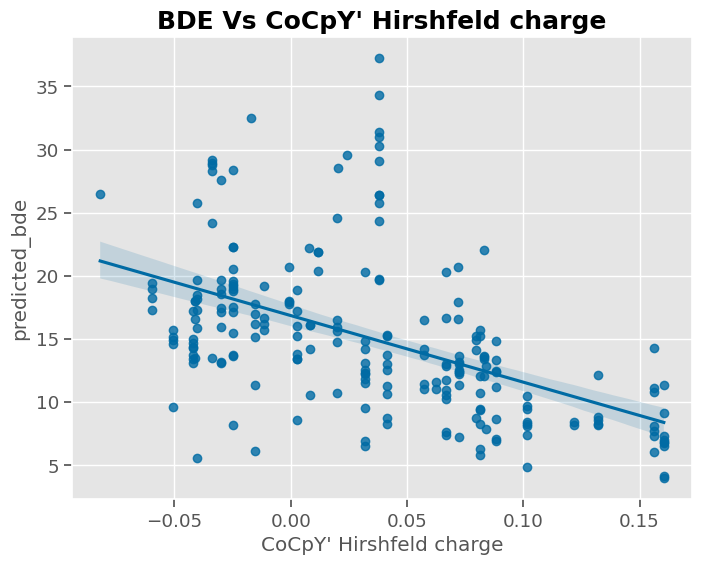

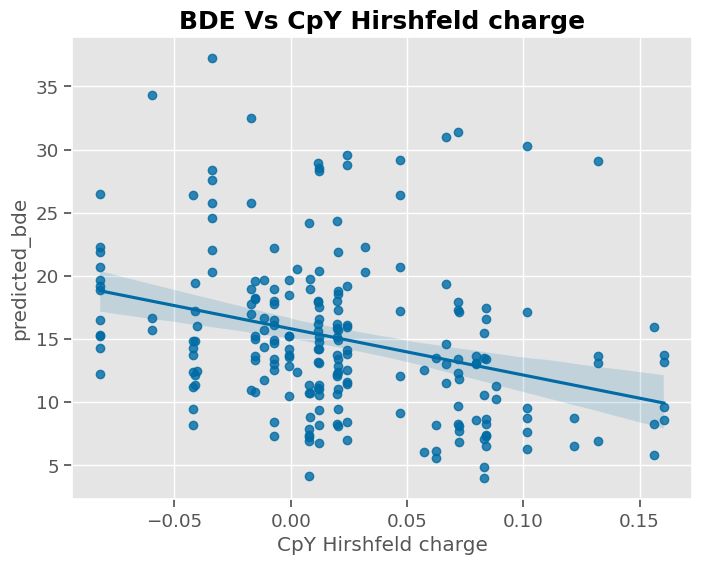

In [311]:
feat_cols = ["EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", 
              "EHOMO(CpY) (Eh)", "ELUMO(CpY) (Eh)", 
              "CoCpY' Hirshfeld charge", "CpY Hirshfeld charge"]
for i in feat_cols:
    plt.figure(figsize=(8,6))
    sns.regplot(data = new_test_data, x = i , y = 'predicted_bde')
    plt.title(f'BDE Vs {i}', fontsize = 18, fontweight = 'bold')
    plt.savefig(f'pred_bdevs{i}.png')

## For Random Forest

In [52]:
#parametrs of random forest model
rf_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_

In [53]:
#maximum max_depth value of estimators of rf 
est_depth = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depth)

23

In [54]:
rf_param_grid = {'randomforestregressor__n_estimators':[25,50,75,100,125,150,175,200],
                 'randomforestregressor__max_depth': range(5, 50, 5)}

In [55]:
rf_pipe_gs = GridSearchCV(rf_pipe, rf_param_grid, cv =5)
rf_pipe_gs.fit(X_train, y_train);


In [56]:
print(f'Best parameters: {rf_pipe_gs.best_params_}')

Best parameters: {'randomforestregressor__max_depth': 25, 'randomforestregressor__n_estimators': 50}


In [57]:
rf_opt = rf_pipe_gs.best_estimator_
rf_opt.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=25, n_estimators=50,
                                       random_state=42))])

In [58]:
eval_model(rf_opt)

,Metrics,Train Score,Test Score
1,MAE,0.564383,1.736653
2,MSE,0.873664,8.975243
3,RMSE,0.9347,2.995871
4,R2,0.979996,0.798638


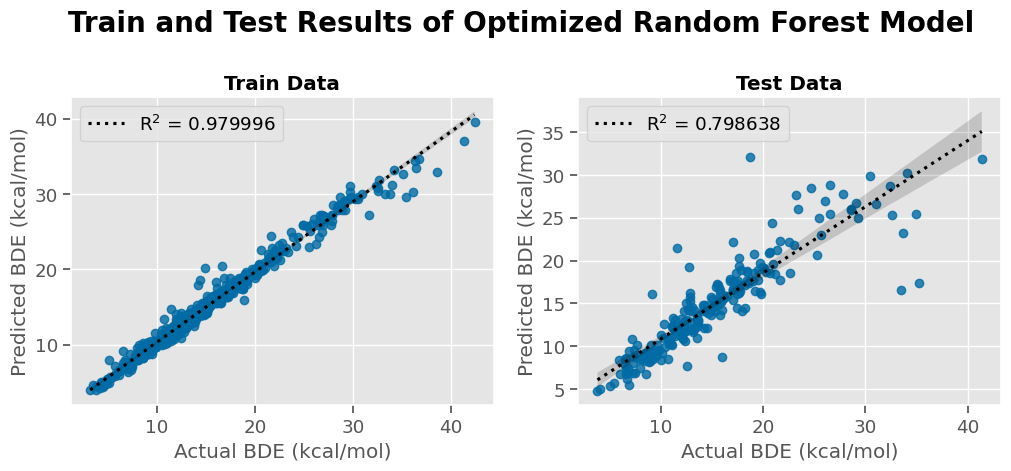

In [203]:
train_test_plot('Optimized Random Forest Model', rf_opt)
plt.savefig('rt_opt.png')

## For Bagged Tree

In [60]:
#parametrs of decision tree model
bt_pipe.get_params()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('baggingregressor', BaggingRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'baggingregressor': BaggingRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'baggingregressor__base_estimator': None,
 'baggingregressor__bootstrap': True,
 'baggingregressor__bootstrap_features': False,
 'baggingregressor__max_features': 1.0,
 'baggingregressor__max_samples': 1.0,
 'baggingregressor__n_estimators': 10,
 'baggingregressor__n_jobs': None,
 'baggingregressor__oob_score': False,
 'baggingregressor__random_state': 42,
 'baggingregressor__verbose': 0,
 'baggingregressor__warm_start': False}

In [61]:
bt_param_grid = {'baggingregressor__n_estimators':range(10, 80, 10)}

In [62]:
bt_pipe_gs = GridSearchCV(bt_pipe, bt_param_grid, cv=5)
bt_pipe_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('baggingregressor',
                                        BaggingRegressor(random_state=42))]),
             param_grid={'baggingregressor__n_estimators': range(10, 80, 10)})

In [63]:
print(f'Best parameters: {bt_pipe_gs.best_params_}')

Best parameters: {'baggingregressor__n_estimators': 60}


In [64]:
bt_opt = bt_pipe_gs.best_estimator_
bt_opt.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor',
                 BaggingRegressor(n_estimators=60, random_state=42))])

In [65]:
eval_model(bt_opt)

,Metrics,Train Score,Test Score
1,MAE,0.550939,1.711683
2,MSE,0.831883,8.827774
3,RMSE,0.912076,2.971157
4,R2,0.980953,0.801947


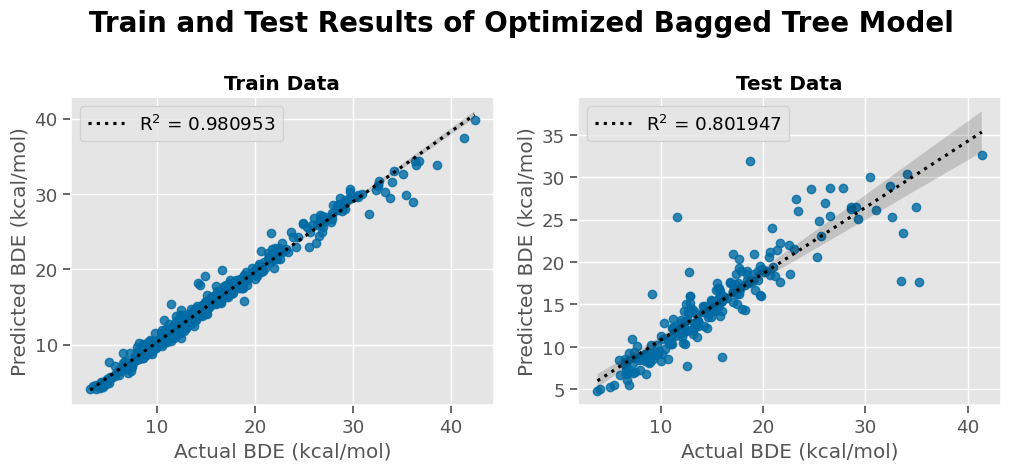

In [201]:
train_test_plot('Optimized Bagged Tree Model', bt_opt)
plt.savefig('bt_opt.png')

##Evaluvation of optimized models

In [210]:
model = ['XG Boost','Random Forest', 'Bagged Tree']
pipe = [xgb_opt, rf_opt, bt_opt]
final_eval_results = pd.DataFrame(columns = ['Model','Train R2', 'Test R2', 'Train RMSE (kcal/mol)', 'Test RMSE (kcal/mol)'])

for i in range(len(model)):
  final_eval_results.loc[i, 'Model'] = model[i]
  final_eval_results.loc[i,'Train R2'], final_eval_results.loc[i,'Test R2'], final_eval_results.loc[i,'Train RMSE (kcal/mol)'], final_eval_results.loc[i,'Test RMSE (kcal/mol)'] = eval_model_final(pipe[i])

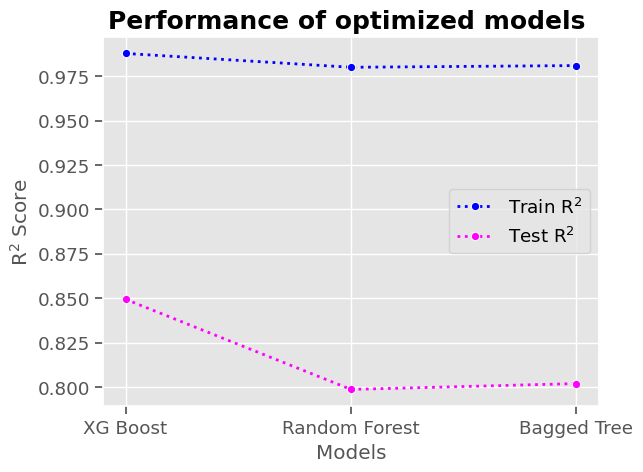

In [226]:
sns.lineplot(data = final_eval_results, x = 'Model', y= 'Train R2', 
             ls = ':', marker = 'o', label = 'Train R$^2$', lw = 2, color = 'blue' )
sns.lineplot(data = final_eval_results, x = 'Model', y= 'Test R2', 
             ls = ':', marker = 'o', label = 'Test R$^2$', lw = 2, color = 'magenta' )
plt.ylabel('R$^2$ Score')
plt.xlabel('Models')
plt.title('Performance of optimized models ', fontsize = 18, fontweight = 'bold')
plt.savefig('r2_opt_models.png')

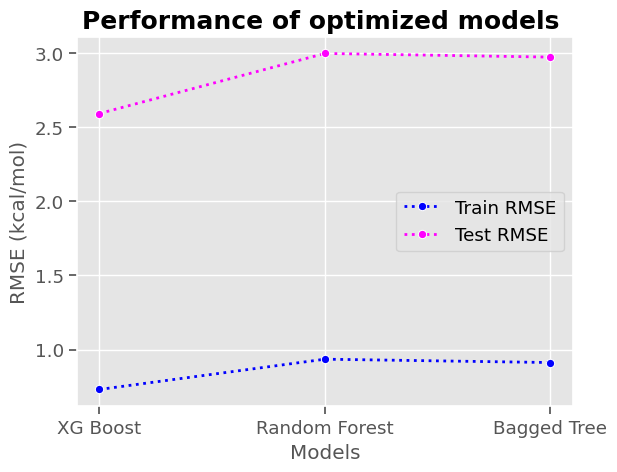

In [228]:
sns.lineplot(data = final_eval_results, x = 'Model', y= 'Train RMSE (kcal/mol)', 
             ls = ':', marker = 'o', label = 'Train RMSE', lw = 2, color = 'blue')
sns.lineplot(data = final_eval_results, x = 'Model', y= 'Test RMSE (kcal/mol)', 
             ls = ':', marker = 'o', label = 'Test RMSE', lw = 2, color = 'magenta')
plt.ylabel('RMSE (kcal/mol)')
plt.xlabel('Models')
plt.title('Performance of optimized models ', fontsize = 18, fontweight = 'bold')
plt.savefig('rmse_opt_models.png')

In [229]:
final_eval_results.set_index('Model', inplace = True) 
final_eval_results

,Train R2,Test R2,Train RMSE (kcal/mol),Test RMSE (kcal/mol)
Model,,,,
XG Boost,0.987776,0.849386,0.730677,2.591003
Random Forest,0.979996,0.798638,0.9347,2.995871
Bagged Tree,0.980953,0.801947,0.912076,2.971157


Acording to the above scores for optimized models, XG Boost regression model is selected as the best ML model since it gained the highest R$^2$ score and lowest train and test RMSE scores.

# Identify Outliers

In [195]:
test_data =  pd.DataFrame(index = y_test.index)
test_data['Name'] = ml_df.loc[X_test.index, 'Name']
test_data["CoCpY' name"] = ml_df.loc[X_test.index, "CoCpY' name"]
test_data["CpY name"] = ml_df.loc[X_test.index, "CpY name"]
test_data['Actual BDE'] = y_test
test_data['XG Boost predicted BDE']= xgb_opt.predict(X_test)
test_data['xgb_error'] = abs(y_test - xgb_opt.predict(X_test))
test_data['Random Forest predicted BDE']= rf_opt.predict(X_test)
test_data['rf_error'] = abs(y_test - rf_opt.predict(X_test))
test_data['Bagged Tree predicted BDE']= bt_opt.predict(X_test)
test_data['bt_error'] = abs(y_test - bt_opt.predict(X_test))
test_data

,Name,CoCpY' name,CpY name,Actual BDE,XG Boost predicted BDE,xgb_error,Random Forest predicted BDE,rf_error,Bagged Tree predicted BDE,bt_error
825,Co(Cp-o-PhCl)(Cp-o-PhCl)OH,o-PhCl,o-PhCl,17.641300,16.662981,0.978319,16.496540,1.144760,16.415352,1.225949
320,Co(Cp-CH₃)(Cp-(CO)F)OH,CH₃,(CO)F,17.057187,17.117128,0.059941,16.598758,0.458429,16.437432,0.619755
383,Co(Cp-C₃H₇)(Cp-(CO)CH₃)OH,C₃H₇,(CO)CH₃,31.062928,29.160648,1.902280,26.613791,4.449137,26.183378,4.879550
764,Co(Cp-CN)(Cp-NC₅H₁₀)OH,CN,NC₅H₁₀,14.247297,14.278896,0.031600,14.371344,0.124047,14.360053,0.112756
423,Co(Cp-H)(Cp-NO₂)OH,H,NO₂,10.225963,9.657981,0.567982,10.958030,0.732067,10.925425,0.699462
...,...,...,...,...,...,...,...,...,...,...
628,Co(Cp-(CO)H)(Cp-(CO)F)OH,(CO)H,(CO)F,6.626267,6.298653,0.327614,6.222001,0.404266,6.121777,0.504490
525,Co(Cp-(CO)NHCH₃)(Cp-(CO)NHCH₃)OH,(CO)NHCH₃,(CO)NHCH₃,12.697724,20.346857,7.649133,19.284215,6.586491,18.807465,6.109741
339,Co(Cp-CH₃)(Cp-NC₅H₁₀)OH,CH₃,NC₅H₁₀,22.474303,22.316170,0.158133,22.120918,0.353384,22.047398,0.426905
664,Co(Cp-(CO)F)(Cp-p-PhCF₃)OH,(CO)F,p-PhCF₃,7.866830,8.433908,0.567077,8.478039,0.611209,8.454420,0.587590


In [197]:
top9_outliers = test_data[(test_data['xgb_error']>=4)&(test_data['rf_error']>=4)&(test_data['bt_error']>=4)]
top9_outliers
top9_outliers.to_excel('top9_outlier.xlsx')

In [198]:
top9_outliers = top9_outliers.sort_values(by = 'Actual BDE')

Above derivatives are the top 9 derivatives which made the largest error with actual BDE in all 3 best models. 
- |Actual BDE - Predicted BDE | >= 4 kcal/mol

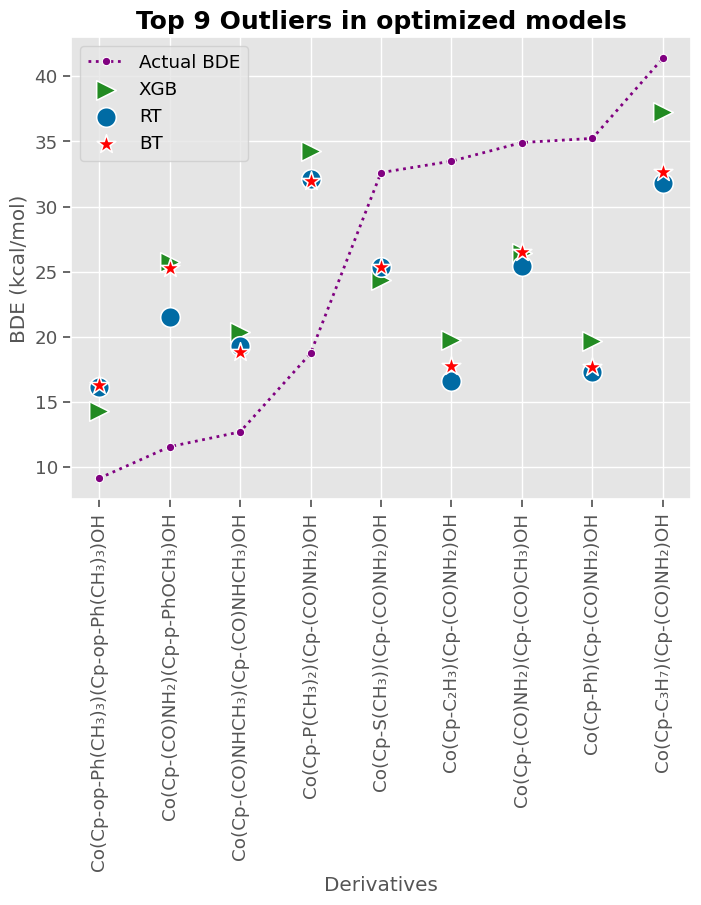

In [199]:
fig, ax =plt.subplots(figsize=(8,6))
sns.lineplot(data = top9_outliers, x = "Name", y = 'Actual BDE', 
             label= 'Actual BDE', marker= 'o', ls = ':', color = 'purple', lw = 2, ax = ax)
sns.scatterplot(data = top9_outliers, x = 'Name', y = 'XG Boost predicted BDE',
                label= 'XGB', marker = '>', s = 200, color = 'forestgreen')
sns.scatterplot(data = top9_outliers, x = 'Name', y = 'Random Forest predicted BDE',
                label= 'RT', s =200)
sns.scatterplot(data = top9_outliers, x = 'Name', y = 'Bagged Tree predicted BDE',
                label= 'BT', marker = '*', s =200, color = 'red')
plt.xticks(rotation =90)
plt.ylabel('BDE (kcal/mol)')
plt.xlabel('Derivatives')
plt.title('Top 9 Outliers in optimized models', fontsize = 18, fontweight = 'bold')
plt.savefig('top9_outlier.png')

In [248]:
ml_df['CpY Hirshfeld charge'].unique()

array([ 0.01184 ,  0.0469  ,  0.062475,  0.011965,  0.020254,  0.024095,
       -0.00712 , -0.01694 , -0.08196 ,  0.00779 , -0.01519 ,  0.071736,
       -0.03387 ,  0.01984 , -0.05959 ,  0.019722, -0.00078 ,  0.00847 ,
        0.072356,  0.084139,  0.083209,  0.079571,  0.121657,  0.057107,
        0.160449,  0.132226, -0.01153 ,  0.002747, -0.04214 , -0.04108 ,
       -0.04035 , -0.02496 ,  0.031767,  0.03808 ,  0.06672 ,  0.081263,
        0.101747,  0.041561,  0.156189,  0.088178, -0.02992 , -0.05062 ])

# Application of PCA

In [69]:
print(f'Shape of X_train before PCA: {X_train.shape}')

Shape of X_train before PCA: (654, 6)


In [70]:
processed_x = scaler.fit_transform(X_train)
print(f'Shape of processed X_train before PCA: {processed_x.shape}')
pca = PCA()
print(f'Shape of processed X_train after PCA: {pca.fit_transform(processed_x).shape}')

Shape of processed X_train before PCA: (654, 6)
Shape of processed X_train after PCA: (654, 6)


Text(0, 0.5, 'Proportion of Explained Variance')

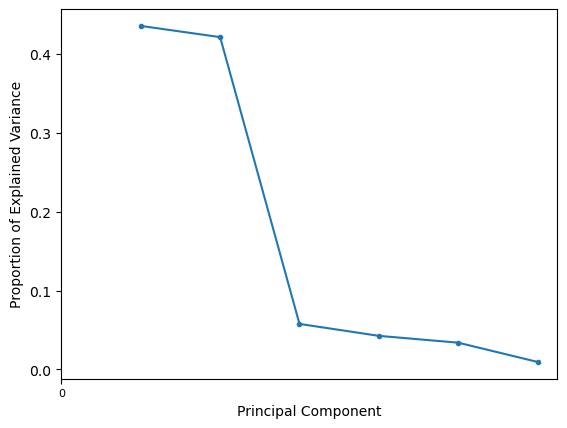

In [71]:
plt.plot(range(1,7), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, ), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [72]:
#define the function for pca model
def pca_model(model):
  pca = PCA(n_components = 0.95)
  model_pca_pipe = make_pipeline(scaler, pca, model)
  model_pca_pipe.fit(X_train, y_train)

  return (model_pca_pipe)

In [73]:
xgb_pca =pca_model(XGBRegressor(random_state= 42))

#evaluvation of initial xgb with pca
eval_model(xgb_pca)

,Metrics,Train Score,Test Score
1,MAE,0.167518,3.086681
2,MSE,0.054762,27.799978
3,RMSE,0.234012,5.272568
4,R2,0.998746,0.376301


In [74]:
bt_pca =pca_model(BaggingRegressor(random_state = 42))

#evaluvation of bt with pca
eval_model(bt_pca)

,Metrics,Train Score,Test Score
1,MAE,1.179539,3.243015
2,MSE,3.791804,25.963399
3,RMSE,1.947255,5.095429
4,R2,0.913182,0.417505


In [75]:
rf_pca =pca_model(RandomForestRegressor(random_state= 42))

#evaluvation of initial rf with pca
eval_model(rf_pca) 
 

,Metrics,Train Score,Test Score
1,MAE,1.068754,3.031089
2,MSE,2.951861,23.977624
3,RMSE,1.718098,4.896695
4,R2,0.932414,0.462056


In [76]:
model = ['XG Boost with PCA', 'Bagged Tree with PCA','Random Forest with PCA']
pipe = [xgb_pca, bt_pca, rf_pca]
pca_eval_results = pd.DataFrame(columns = ['Model','Train R2', 'Test R2', 'Train RMSE (kcal/mol)', 'Test RMSE (kcal/mol)'])

for i in range(len(model)):
  pca_eval_results.loc[i, 'Model'] = model[i]
  pca_eval_results.loc[i,'Train R2'], pca_eval_results.loc[i,'Test R2'], pca_eval_results.loc[i,'Train RMSE (kcal/mol)'], pca_eval_results.loc[i,'Test RMSE (kcal/mol)'] = eval_model_final(pipe[i])

In [77]:
pca_eval_results.set_index('Model', inplace = True) 
pca_eval_results

,Train R2,Test R2,Train RMSE (kcal/mol),Test RMSE (kcal/mol)
Model,,,,
XG Boost with PCA,0.998746,0.376301,0.234012,5.272568
Bagged Tree with PCA,0.913182,0.417505,1.947255,5.095429
Random Forest with PCA,0.932414,0.462056,1.718098,4.896695


Application of PCA increased the overfitting even more than the initial models. Therefore, applying PCA is not helpful to enhance the ML models.

# Deep Learning model

In [78]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Used functions

In [79]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [80]:
# Make predictions and evaluate your model
def eval_nn_model(model, X_train_scaled = X_train_scaled, X_test_pca = X_test_scaled):
  train_preds = model.predict(X_train_scaled)
  test_preds = model.predict(X_test_scaled)

  print('training MAE:', mean_absolute_error(y_train, train_preds))
  print('testing MAE:', mean_absolute_error(y_test, test_preds))
  print('\n')
  print('training rmse:', np.sqrt(mean_squared_error(y_train, train_preds)))
  print('testing rmse:', np.sqrt(mean_squared_error(y_test, test_preds)))
  print('\n')
  print('training R2:', r2_score(y_train, train_preds))
  print('testing R2:', r2_score(y_test, test_preds))

## Model 1

In [81]:
input_shape = X_train.shape[1]
input_shape

6

In [82]:
model1 = Sequential()

model1.add(Dense(10, input_dim = input_shape, activation = 'relu', name = 'h1'))
model1.add(Dense(10, activation = 'relu', name = 'h2'))
model1.add(Dense(1, activation = 'linear', name = 'output'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 10)                70        
                                                                 
 h2 (Dense)                  (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [83]:
# this controls the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.01)


# compile model with additional metrics
model1.compile(loss = 'mse', optimizer = opt,
               metrics= [metrics.MeanAbsoluteError(),
                        metrics.RootMeanSquaredError()])

In [84]:
history1 = model1.fit(X_train_scaled, y_train,
                     validation_data = (X_test_scaled, y_test),
                     epochs = 100,
                      batch_size=32)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/21 [=====================>........] - ETA: 0s - loss: 249.9815 - mean_absolute_error: 14.3497 - root_mean_squared_error: 15.8108 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000021312FA5A60> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTO

21/21 [==============================] - 0s 6ms/step - loss: 21.9827 - mean_absolute_error: 2.7951 - root_mean_squared_error: 4.6886 - val_loss: 27.0255 - val_mean_absolute_error: 3.0707 - val_root_mean_squared_error: 5.1986
Epoch 28/100
21/21 [==============================] - 0s 6ms/step - loss: 21.3922 - mean_absolute_error: 2.7453 - root_mean_squared_error: 4.6252 - val_loss: 25.9982 - val_mean_absolute_error: 3.0055 - val_root_mean_squared_error: 5.0988
Epoch 29/100
21/21 [==============================] - 0s 6ms/step - loss: 21.1980 - mean_absolute_error: 2.6758 - root_mean_squared_error: 4.6041 - val_loss: 25.8366 - val_mean_absolute_error: 2.9183 - val_root_mean_squared_error: 5.0830
Epoch 30/100
21/21 [==============================] - 0s 6ms/step - loss: 21.6224 - mean_absolute_error: 2.7231 - root_mean_squared_error: 4.6500 - val_loss: 25.9038 - val_mean_absolute_error: 2.8929 - val_root_mean_squared_error: 5.0896
Epoch 31/100
21/21 [==============================] - 0s 6ms/

21/21 [==============================] - 0s 6ms/step - loss: 19.8626 - mean_absolute_error: 2.6542 - root_mean_squared_error: 4.4567 - val_loss: 24.6023 - val_mean_absolute_error: 2.8950 - val_root_mean_squared_error: 4.9601
Epoch 62/100
21/21 [==============================] - 0s 6ms/step - loss: 20.0719 - mean_absolute_error: 2.6600 - root_mean_squared_error: 4.4802 - val_loss: 25.9188 - val_mean_absolute_error: 3.1356 - val_root_mean_squared_error: 5.0911
Epoch 63/100
21/21 [==============================] - 0s 6ms/step - loss: 19.8216 - mean_absolute_error: 2.7083 - root_mean_squared_error: 4.4521 - val_loss: 25.5742 - val_mean_absolute_error: 2.8214 - val_root_mean_squared_error: 5.0571
Epoch 64/100
21/21 [==============================] - 0s 6ms/step - loss: 19.4431 - mean_absolute_error: 2.5498 - root_mean_squared_error: 4.4094 - val_loss: 24.6546 - val_mean_absolute_error: 3.0536 - val_root_mean_squared_error: 4.9653
Epoch 65/100
21/21 [==============================] - 0s 6ms/

21/21 [==============================] - 0s 6ms/step - loss: 17.5713 - mean_absolute_error: 2.4994 - root_mean_squared_error: 4.1918 - val_loss: 23.7865 - val_mean_absolute_error: 2.8734 - val_root_mean_squared_error: 4.8771
Epoch 96/100
21/21 [==============================] - 0s 6ms/step - loss: 17.5418 - mean_absolute_error: 2.4761 - root_mean_squared_error: 4.1883 - val_loss: 23.3038 - val_mean_absolute_error: 2.9313 - val_root_mean_squared_error: 4.8274
Epoch 97/100
21/21 [==============================] - 0s 6ms/step - loss: 17.8413 - mean_absolute_error: 2.5338 - root_mean_squared_error: 4.2239 - val_loss: 23.5832 - val_mean_absolute_error: 2.9481 - val_root_mean_squared_error: 4.8563
Epoch 98/100
21/21 [==============================] - 0s 6ms/step - loss: 17.8105 - mean_absolute_error: 2.5410 - root_mean_squared_error: 4.2202 - val_loss: 23.3058 - val_mean_absolute_error: 2.8101 - val_root_mean_squared_error: 4.8276
Epoch 99/100
21/21 [==============================] - 0s 6ms/

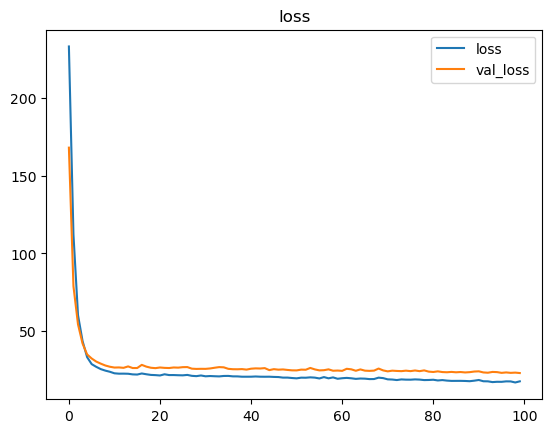

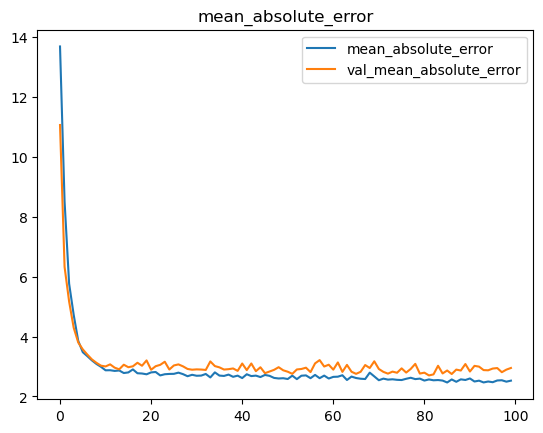

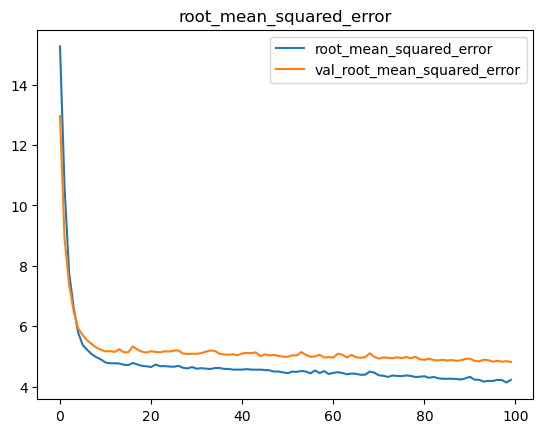

In [85]:
plot_history(history1)

In [86]:
eval_nn_model(model1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7/7 [==============================] - 0s 2ms/step
training MAE: 2.471151109259084
testing MAE: 2.9511292546342944


training rmse: 4.105313123558378
testing rmse: 4.815909574282718


training R2: 0.6141171074357694
testing R2: 0.4796598345212103


7/7 [==============================] - 0s 2ms/step


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

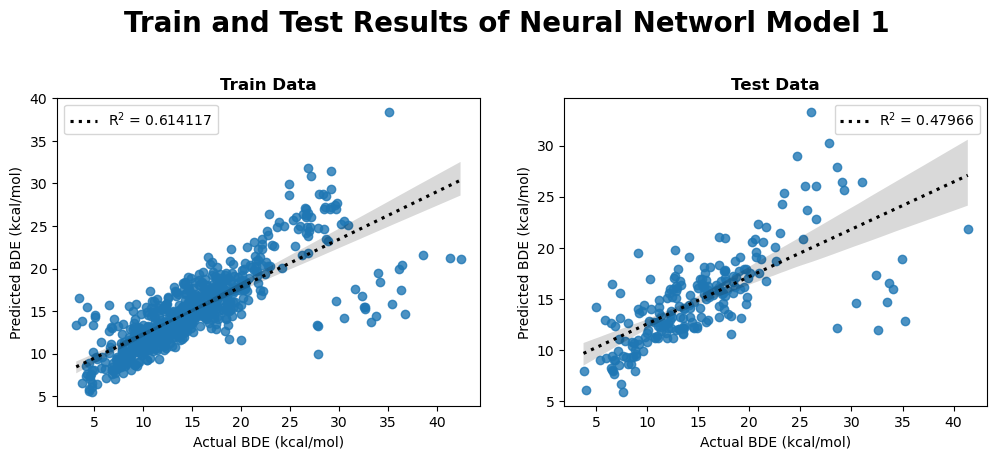

In [87]:
train_test_plot('Neural Networl Model 1', model1, X_train=X_train_scaled, y_train=y_train, X_test=X_test_scaled , y_test= y_test)

- By looking at the above plots, model1 is too simple or trained for too few epochs to predict a dataset well. As the next step, I will increase the complexity of the model.
- According to the calculated scores, training scores are better than the testing scores which implies the overfitting.
- So I just give a try by making the model much complicated by increasing the number of nodes and epoches.
- And also use the early stopping method to restrict over doing the epochs.

## Model 2

In [88]:
input_shape = X_train.shape[1]
input_shape

6

In [89]:
model2 = Sequential()

model2.add(Dense(20, input_dim = input_shape, activation = 'relu', name = 'h1'))
model2.add(Dense(20, activation = 'relu', name = 'h2'))
model2.add(Dense(1, activation = 'linear', name = 'output'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 20)                140       
                                                                 
 h2 (Dense)                  (None, 20)                420       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [90]:
# this controls the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.01)


# compile model with additional metrics
model2.compile(loss = 'mse', optimizer = opt,
               metrics= [metrics.MeanAbsoluteError(),
                        metrics.RootMeanSquaredError()])

In [91]:
early_stopping = EarlyStopping(patience= 10)

In [92]:
from xgboost.training import callback
history2 = model2.fit(X_train_scaled, y_train,
                     validation_data = (X_test_scaled, y_test),
                     epochs = 200,
                      batch_size=32,
                      callbacks = [early_stopping])

Epoch 1/200
21/21 [==============================] - 2s 32ms/step - loss: 187.6689 - mean_absolute_error: 11.9433 - root_mean_squared_error: 13.6992 - val_loss: 75.7255 - val_mean_absolute_error: 6.4616 - val_root_mean_squared_error: 8.7020
Epoch 2/200
21/21 [==============================] - 0s 7ms/step - loss: 62.6127 - mean_absolute_error: 5.9223 - root_mean_squared_error: 7.9128 - val_loss: 54.2991 - val_mean_absolute_error: 5.1186 - val_root_mean_squared_error: 7.3688
Epoch 3/200
21/21 [==============================] - 0s 6ms/step - loss: 41.1359 - mean_absolute_error: 4.5853 - root_mean_squared_error: 6.4137 - val_loss: 41.6755 - val_mean_absolute_error: 4.4681 - val_root_mean_squared_error: 6.4557
Epoch 4/200
21/21 [==============================] - 0s 6ms/step - loss: 32.3184 - mean_absolute_error: 3.8706 - root_mean_squared_error: 5.6849 - val_loss: 35.1368 - val_mean_absolute_error: 3.8603 - val_root_mean_squared_error: 5.9276
Epoch 5/200
21/21 [=============================

21/21 [==============================] - 0s 7ms/step - loss: 16.3348 - mean_absolute_error: 2.6770 - root_mean_squared_error: 4.0416 - val_loss: 19.8235 - val_mean_absolute_error: 3.0167 - val_root_mean_squared_error: 4.4524
Epoch 36/200
21/21 [==============================] - 0s 6ms/step - loss: 16.0548 - mean_absolute_error: 2.6048 - root_mean_squared_error: 4.0068 - val_loss: 21.0192 - val_mean_absolute_error: 3.2022 - val_root_mean_squared_error: 4.5847
Epoch 37/200
21/21 [==============================] - 0s 6ms/step - loss: 16.1405 - mean_absolute_error: 2.6619 - root_mean_squared_error: 4.0175 - val_loss: 20.6622 - val_mean_absolute_error: 3.0102 - val_root_mean_squared_error: 4.5456
Epoch 38/200
21/21 [==============================] - 0s 6ms/step - loss: 15.8136 - mean_absolute_error: 2.6137 - root_mean_squared_error: 3.9766 - val_loss: 20.4628 - val_mean_absolute_error: 2.9944 - val_root_mean_squared_error: 4.5236
Epoch 39/200
21/21 [==============================] - 0s 6ms/

21/21 [==============================] - 0s 5ms/step - loss: 12.5419 - mean_absolute_error: 2.3030 - root_mean_squared_error: 3.5415 - val_loss: 17.6333 - val_mean_absolute_error: 2.8581 - val_root_mean_squared_error: 4.1992
Epoch 70/200
21/21 [==============================] - 0s 5ms/step - loss: 12.4030 - mean_absolute_error: 2.3316 - root_mean_squared_error: 3.5218 - val_loss: 19.9716 - val_mean_absolute_error: 2.9067 - val_root_mean_squared_error: 4.4690
Epoch 71/200
21/21 [==============================] - 0s 6ms/step - loss: 15.0650 - mean_absolute_error: 2.6766 - root_mean_squared_error: 3.8814 - val_loss: 22.2160 - val_mean_absolute_error: 3.2536 - val_root_mean_squared_error: 4.7134
Epoch 72/200
21/21 [==============================] - 0s 6ms/step - loss: 14.1482 - mean_absolute_error: 2.5224 - root_mean_squared_error: 3.7614 - val_loss: 18.0745 - val_mean_absolute_error: 2.9303 - val_root_mean_squared_error: 4.2514
Epoch 73/200
21/21 [==============================] - 0s 6ms/

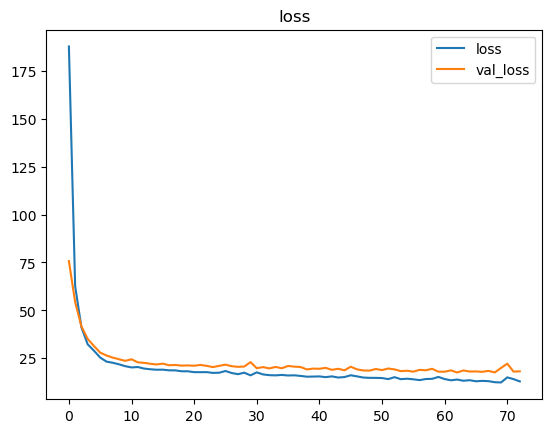

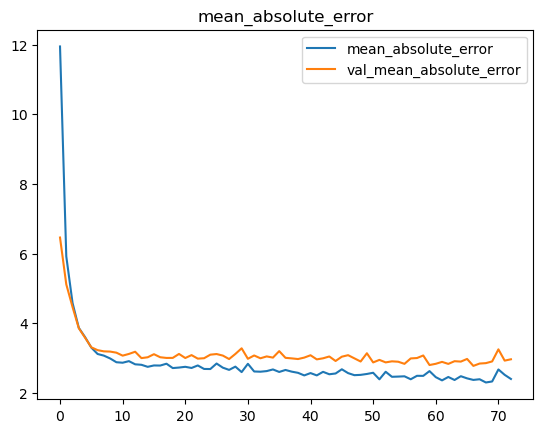

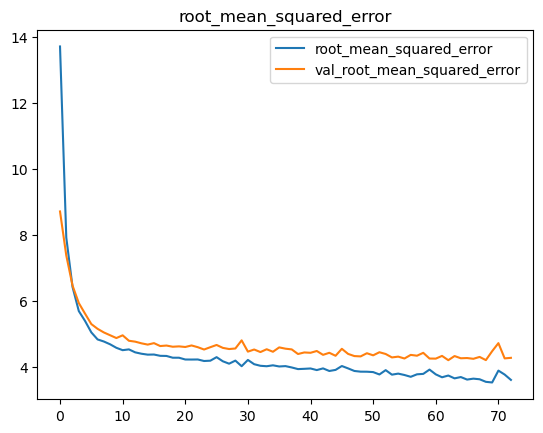

In [93]:
plot_history(history2)

In [94]:
eval_nn_model(model2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7/7 [==============================] - 0s 2ms/step
training MAE: 2.4239080803818327
testing MAE: 2.9684342181674674


training rmse: 3.584831091373562
testing rmse: 4.268098854362862


training R2: 0.7057609258473383
testing R2: 0.5913047008763271


7/7 [==============================] - 0s 2ms/step


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

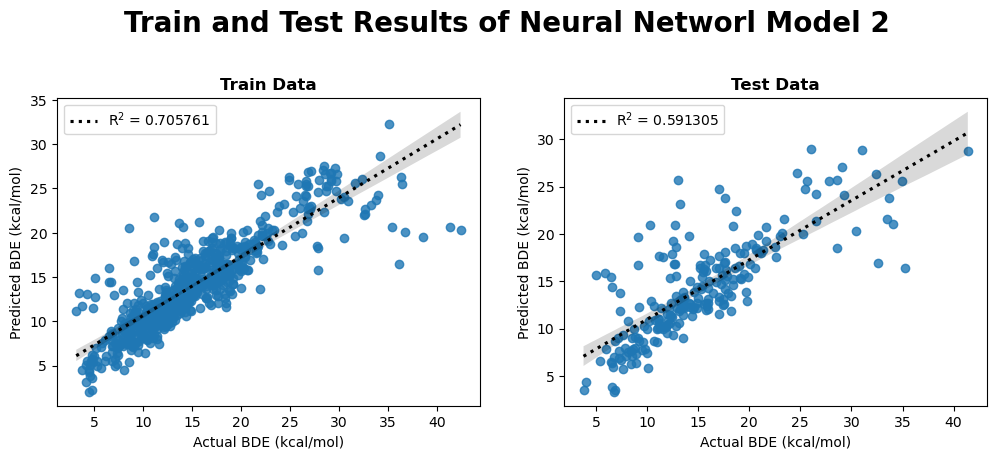

In [95]:
train_test_plot('Neural Networl Model 2', model2, X_train=X_train_scaled, y_train=y_train, X_test=X_test_scaled , y_test= y_test)

- In this model, the number of nodes increased from 10 to 20 and add early stopping method with the patience level of 10.
- According to R$^2$ scores, testing score is higher than the training score which is very good.
- But in MAE and RMSE scores, training score is slightly higher than the testing score.
- So far, model 2 is the best model to predict BDE with the minimum overfitting.

- Here, I'm going to introduce model 3 by doing further modifications to model 2  to have better predictions.
- In model 3;
    - increase number of layers
    - increase number of nodes and applying "Dropout" to turn off some nodes during the training process to choose the correct number of nodes. This is a remedy for overfitting.
    - As another solution for overfitting, L1 and L2 regularization is used

## Model 3

In [96]:
input_shape = X_train.shape[1]
input_shape

6

In [97]:
model3 = Sequential()

model3.add(Dense(50, input_dim = input_shape, activation = 'relu', name = 'h1', 
                 kernel_regularizer = regularizers.l1_l2(l1 = 1e-9, l2 = 1e-7),
                 bias_regularizer = regularizers.l2(1e-7),
                 activity_regularizer = regularizers.l2(1e-7) ))
model3.add(Dropout(0.2))
model3.add(Dense(50, activation = 'relu', name = 'h2', 
                 kernel_regularizer = regularizers.l1_l2(l1 = 1e-9, l2 = 1e-7),
                 bias_regularizer = regularizers.l2(1e-7),
                 activity_regularizer = regularizers.l2(1e-7) ))
model3.add(Dropout(0.2))
model3.add(Dense(50, activation = 'relu', name = 'h3', 
                 kernel_regularizer = regularizers.l1_l2(l1 = 1e-9, l2 = 1e-7),
                 bias_regularizer = regularizers.l2(1e-7),
                 activity_regularizer = regularizers.l2(1e-7) ))
model3.add(Dropout(0.2))

model3.add(Dense(1, activation = 'linear', name = 'output'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 50)                350       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 h2 (Dense)                  (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 h3 (Dense)                  (None, 50)                2550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 output (Dense)              (None, 1)                

In [98]:
# this controls the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.01)


# compile model with additional metrics
model3.compile(loss = 'mse', optimizer = opt,
               metrics= [metrics.MeanAbsoluteError(),
                        metrics.RootMeanSquaredError()])

In [99]:
early_stopping = EarlyStopping(patience= 10)

In [100]:
from xgboost.training import callback
history3 = model3.fit(X_train_scaled, y_train,
                     validation_data = (X_test_scaled, y_test),
                     epochs = 500,
                      batch_size=32,
                      callbacks = [early_stopping])

Epoch 1/500
21/21 [==============================] - 5s 62ms/step - loss: 136.0769 - mean_absolute_error: 8.9857 - root_mean_squared_error: 11.6652 - val_loss: 59.4356 - val_mean_absolute_error: 5.5062 - val_root_mean_squared_error: 7.7094
Epoch 2/500
21/21 [==============================] - 0s 7ms/step - loss: 47.0446 - mean_absolute_error: 4.9618 - root_mean_squared_error: 6.8589 - val_loss: 33.3364 - val_mean_absolute_error: 3.6104 - val_root_mean_squared_error: 5.7738
Epoch 3/500
21/21 [==============================] - 0s 7ms/step - loss: 34.3595 - mean_absolute_error: 3.9882 - root_mean_squared_error: 5.8617 - val_loss: 30.3877 - val_mean_absolute_error: 3.5473 - val_root_mean_squared_error: 5.5125
Epoch 4/500
21/21 [==============================] - 0s 8ms/step - loss: 34.1389 - mean_absolute_error: 4.0441 - root_mean_squared_error: 5.8428 - val_loss: 27.9603 - val_mean_absolute_error: 3.0823 - val_root_mean_squared_error: 5.2877
Epoch 5/500
21/21 [==============================

21/21 [==============================] - 0s 7ms/step - loss: 22.9368 - mean_absolute_error: 3.2453 - root_mean_squared_error: 4.7892 - val_loss: 20.7489 - val_mean_absolute_error: 2.9627 - val_root_mean_squared_error: 4.5551
Epoch 36/500
21/21 [==============================] - 0s 7ms/step - loss: 20.7343 - mean_absolute_error: 3.2137 - root_mean_squared_error: 4.5535 - val_loss: 21.2829 - val_mean_absolute_error: 3.0013 - val_root_mean_squared_error: 4.6133
Epoch 37/500
21/21 [==============================] - 0s 7ms/step - loss: 20.9517 - mean_absolute_error: 3.1419 - root_mean_squared_error: 4.5773 - val_loss: 28.9288 - val_mean_absolute_error: 3.8891 - val_root_mean_squared_error: 5.3785
Epoch 38/500
21/21 [==============================] - 0s 7ms/step - loss: 23.2656 - mean_absolute_error: 3.2517 - root_mean_squared_error: 4.8234 - val_loss: 22.5581 - val_mean_absolute_error: 2.9352 - val_root_mean_squared_error: 4.7495
Epoch 39/500
21/21 [==============================] - 0s 7ms/

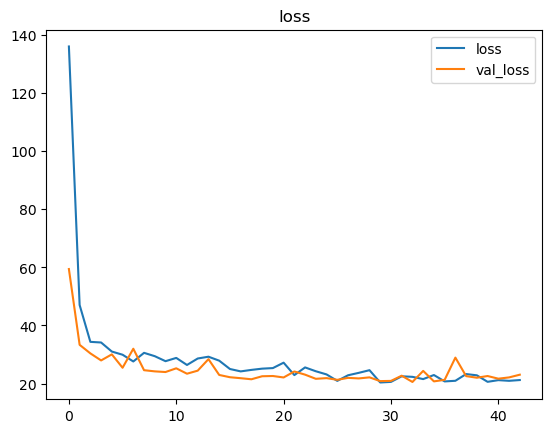

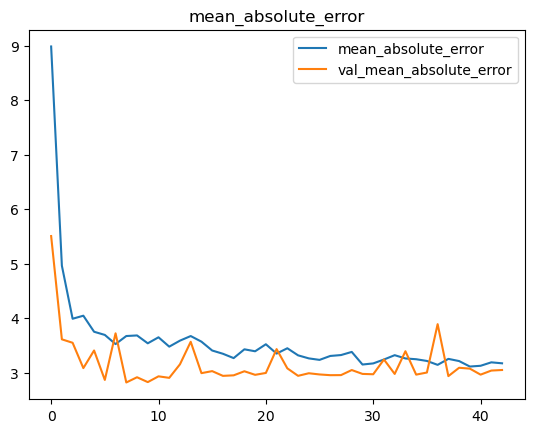

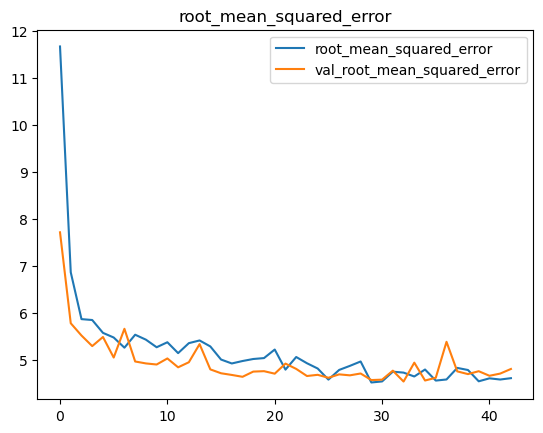

In [101]:
plot_history(history3)

In [102]:
eval_nn_model(model3)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7/7 [==============================] - 0s 2ms/step
training MAE: 2.527886240954209
testing MAE: 3.0474923529624123


training rmse: 3.9035966010674406
testing rmse: 4.800786290060738


training R2: 0.6511065529462403
testing R2: 0.4829227265179843


7/7 [==============================] - 0s 2ms/step


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

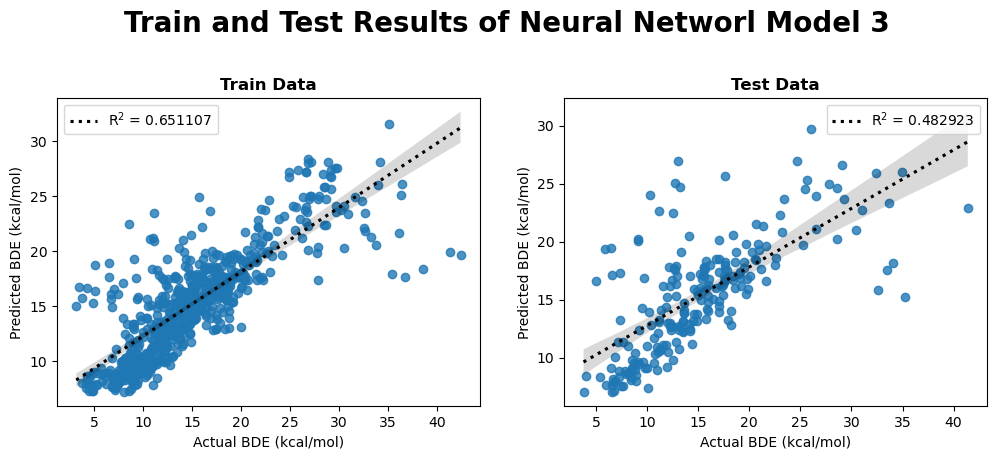

In [103]:
train_test_plot('Neural Networl Model 3', model3, X_train=X_train_scaled, y_train=y_train, X_test=X_test_scaled , y_test= y_test)

- According to the scores, model 3 is still suffering from the overfitting and the performence has decreased comparative to model 2.

## Summary of NN models

In [104]:
models = [model1, model2, model3]
nn_scores = pd.DataFrame()

for i,mod in enumerate(models):
  test_pred = mod.predict(X_test_scaled)
  train_pred = mod.predict(X_train_scaled)
  nn_scores.loc[i, 'Model'] = f'Model{i+1}'
  nn_scores.loc[i, 'Train R2'] = round(r2_score(y_train, train_pred),6)
  nn_scores.loc[i, 'Test R2'] = round(r2_score(y_test, test_pred),6) 
  nn_scores.loc[i, 'Train RMSE (kcal/mol)'] = round(np.sqrt(mean_squared_error(y_train, train_pred)),6)
  nn_scores.loc[i, 'Test RMSE (kcal/mol)'] = round(np.sqrt(mean_squared_error(y_test, test_pred)),6)



21/21 [==============================] - 0s 2ms/step


In [105]:
nn_scores.set_index('Model', inplace = True) 

In [106]:
nn_scores

,Train R2,Test R2,Train RMSE (kcal/mol),Test RMSE (kcal/mol)
Model,,,,
Model1,0.614117,0.479660,4.105313,4.815910
Model2,0.705761,0.591305,3.584831,4.268099
Model3,0.651107,0.482923,3.903597,4.800786


Out of all ML models and NN models, model 2 is selected as best model because it showed the best performce (R$^2$ scors) with minimum overfitting.